# Breast Cancer Wisconsin - ML Classification Project

**Course:** CS-UY 4563 – Introduction to Machine Learning  
**Team Members:**
- Saad Iftikhar
- Ahmed Arkam Mohamed Faisaar

---

## Project Overview

**Dataset:** Breast Cancer Wisconsin from UCI ML Repository  
**Task:** Binary classification
**Samples:** 569 instances  
**Features:** 30 real-valued features describing cell nuclei properties  

**Objective:** Train and evaluate 72 machine learning models (3 algorithms × 4 feature spaces × 6 hyperparameters) to predict breast tumor malignancy with high accuracy.

**Why**: Breast cancer is one of the most common cancers worldwide. Early diagnosis significantly improves survival rates. The goal of this project is to develop a machine learning model that assists medical professionals by prioritizing high-risk patients with high sensitivity, ensuring minimal false negatives.

---

## Import Libraries and Setup

We begin by importing all necessary libraries for:
- Data manipulation (NumPy, Pandas)
- Visualization (Matplotlib, Seaborn)
- Machine learning (scikit-learn)
- Model evaluation


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, confusion_matrix, classification_report,
                           adjusted_rand_score, normalized_mutual_info_score)
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("All libraries imported successfully!")
!pip install ucimlrepo

All libraries imported successfully!




# A. Data Loading

We load the Breast Cancer Wisconsin (Diagnostic) dataset from the UCI Machine Learning Repository.

**Dataset Information:**
- **Source:** UCI ML Repository
- **Samples:** 569 tumor instances
- **Features:** 30 real-valued measurements
- **Target:** Binary classification (0=Benign, 1=Malignant)
- **Missing Values:** None

The dataset will automatically fallback to scikit-learn's version if the UCI repository package is not available.

In [ ]:
# Load dataset
try:
    from ucimlrepo import fetch_ucirepo
    breast_cancer = fetch_ucirepo(id=17)
    X = breast_cancer.data.features
    y = breast_cancer.data.targets
    print("Dataset loaded successfully using ucimlrepo")
except:
    print("ucimlrepo not available, loading from sklearn...")
    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()
    X = pd.DataFrame(data.data, columns=data.feature_names)
    y = pd.DataFrame(data.target, columns=['Diagnosis'])
    # Convert to match UCI format: 0=benign, 1=malignant
    y['Diagnosis'] = 1 - y['Diagnosis']

# Convert target to binary format
if y.iloc[:, 0].dtype == 'object':
    y_binary = (y.iloc[:, 0] == 'M').astype(int)
else:
    y_binary = y.iloc[:, 0]

Dataset loaded successfully using ucimlrepo


### Dataset Summary Statistics

In [ ]:
# Display dataset information
n_sample, n_feature = X.shape
print(f"Dataset shape: {X.shape}")
print(f"Total number of features: {n_feature}")
print(f"Total number of samples: {n_sample}")
print(f"\nClass distribution:")

#number of benign and malignant

ben_cnt = (y_binary == 0).sum()

malign_cnt = (y_binary == 1).sum()

total_cnt = len(y_binary)

#print(ben_cnt,malign_cnt,total_cnt)

print(f"Benign (0): {ben_cnt} ({ben_cnt / total_cnt * 100:.1f}%)")
print(f"Malignant (1): {malign_cnt} ({malign_cnt / total_cnt * 100:.1f}%)")

# Check for missing values
Miss_val = X.isnull().sum().sum()
print(f"\nMissing values: {Miss_val}")


# Display first few rows
display(X.head())

Dataset shape: (569, 30)
Total number of features: 30
Total number of samples: 569

Class distribution:
Benign (0): 357 (62.7%)
Malignant (1): 212 (37.3%)

Missing values: 0


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678




# B. Exploratory Data Analysis

Before training our models, we conducted a comprehensive exploratory data analysis to understand the dataset's underlying structure and potential challenges. Our analysis focused on four key areas:

1. Statistical summaries
2. Feature distributions by class (Benign vs Malignant)
3. Correlation analysis to identify multicollinearity
4. Feature importance ranking using ANOVA F-test

## Statistical Summary

In [ ]:
# Display basic statistics
display(X.describe())

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Feature Distributions by Class

We visualize how key features differ between benign and malignant tumors.

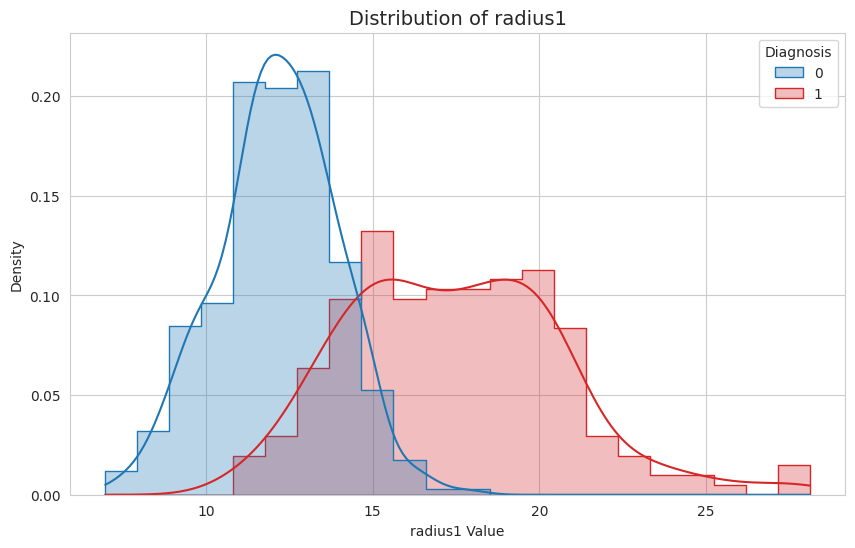

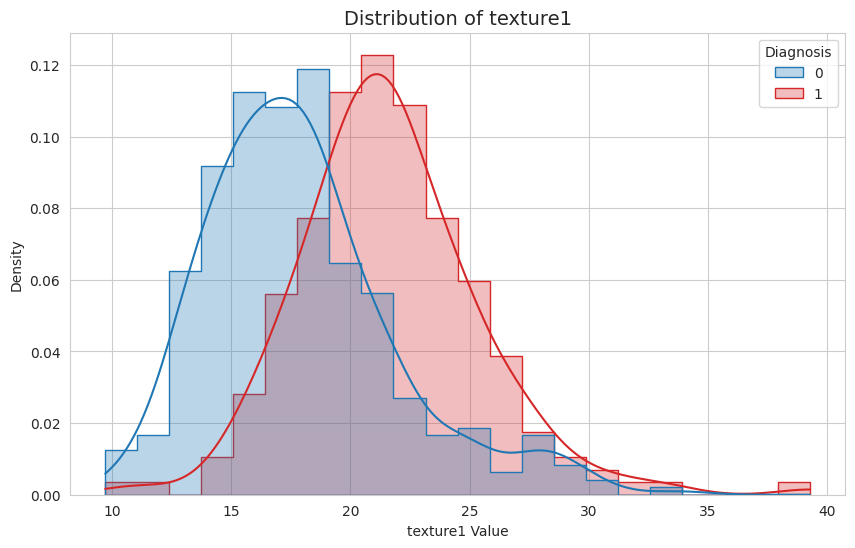

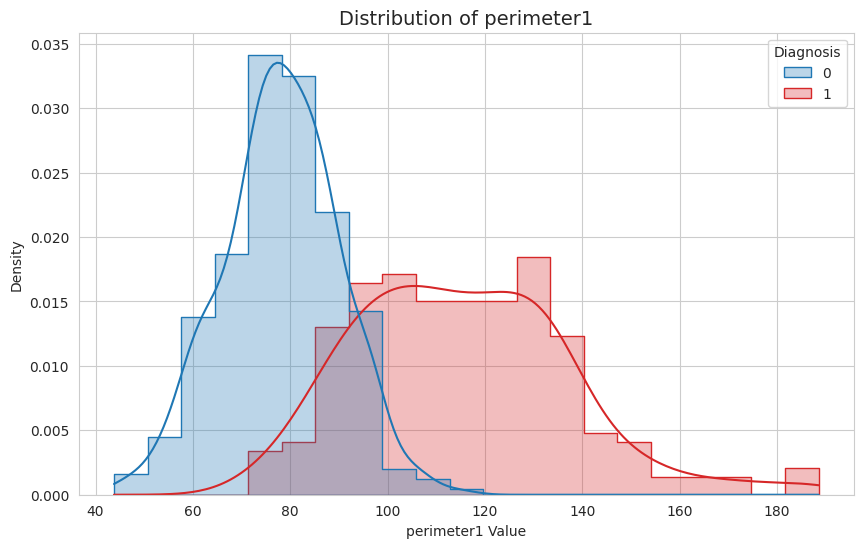

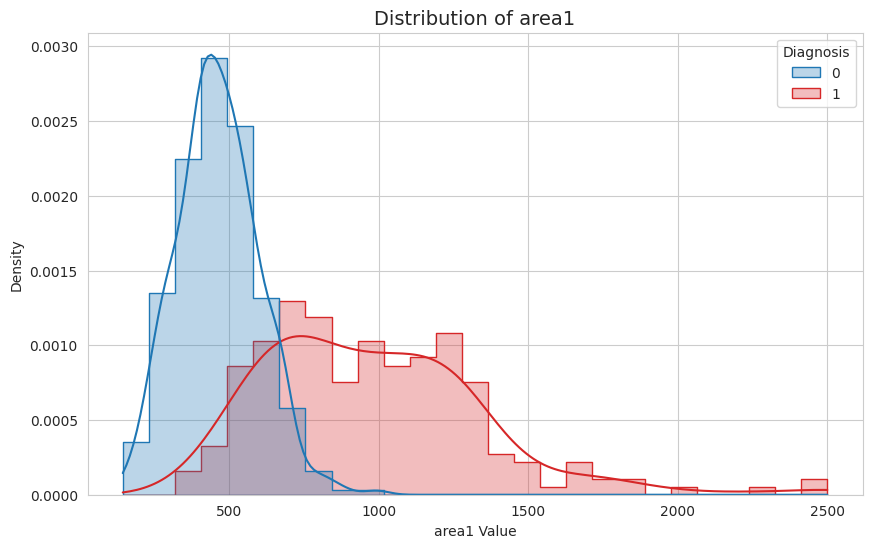

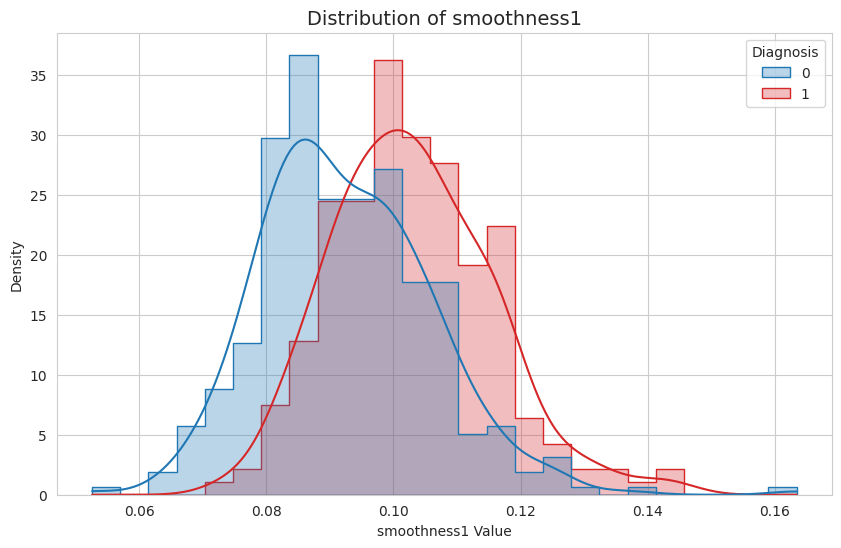

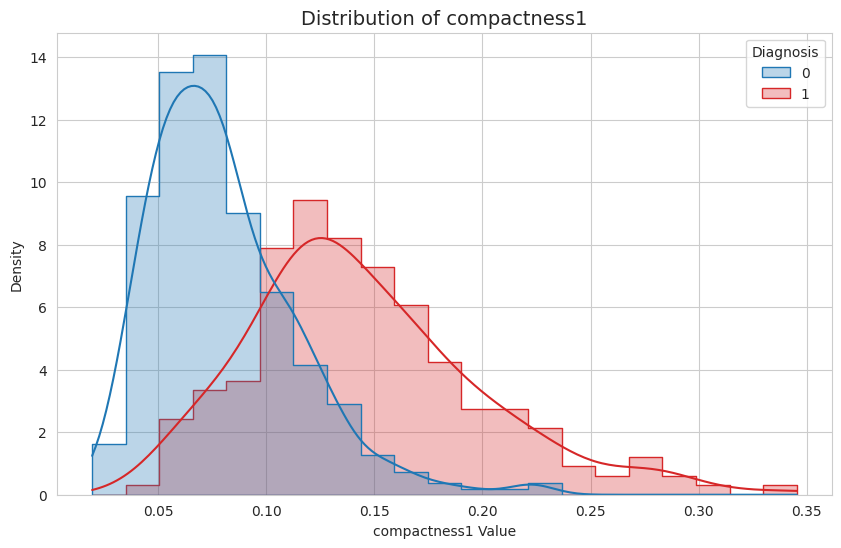

In [ ]:
# Create plot_data by combining features and the target variable
plot_data = X.copy()
plot_data['Diagnosis'] = y_binary

# Loop through features and create a separate figure for each
for feature in X.columns[:6]:
    plt.figure(figsize=(10, 6))

    sns.histplot(
        data=plot_data, # Reusing the dataframe from Option 1
        x=feature,
        hue='Diagnosis',
        kde=True,
        element="step",
        stat="density",
        common_norm=False,
        palette=['#1f77b4', '#d62728'],
        alpha=0.3
    )

    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(f'{feature} Value')
    plt.ylabel('Density')
    plt.show() # Forces the plot to render immediately before the next loop

What the plots tell us:

Some Features Overlap: In contrast, features like Texture and Smoothness look very similar for both classes (the curves overlap significantly). This means these features are "noisier" and probably won't be enough to diagnose cancer on their own—they will need to be combined with others.

Size Matters: The plots show a clear separation for geometric features like Mean Radius and Mean Area. The Malignant cases (Red) are almost always higher than the Benign ones (Blue). This suggests that size is likely our strongest predictor.


Why We Need Scaling: We noticed that features like Area are heavily "skewed" (they have long tails to the right with very large numbers). If we fed this raw data into a model like KNN, it would be biased toward these huge numbers. This confirms that applying StandardScaler is a necessary step to normalize the data range.

## B.3 Correlation Matrix

We compute correlations between all features to identify potential multicollinearity.

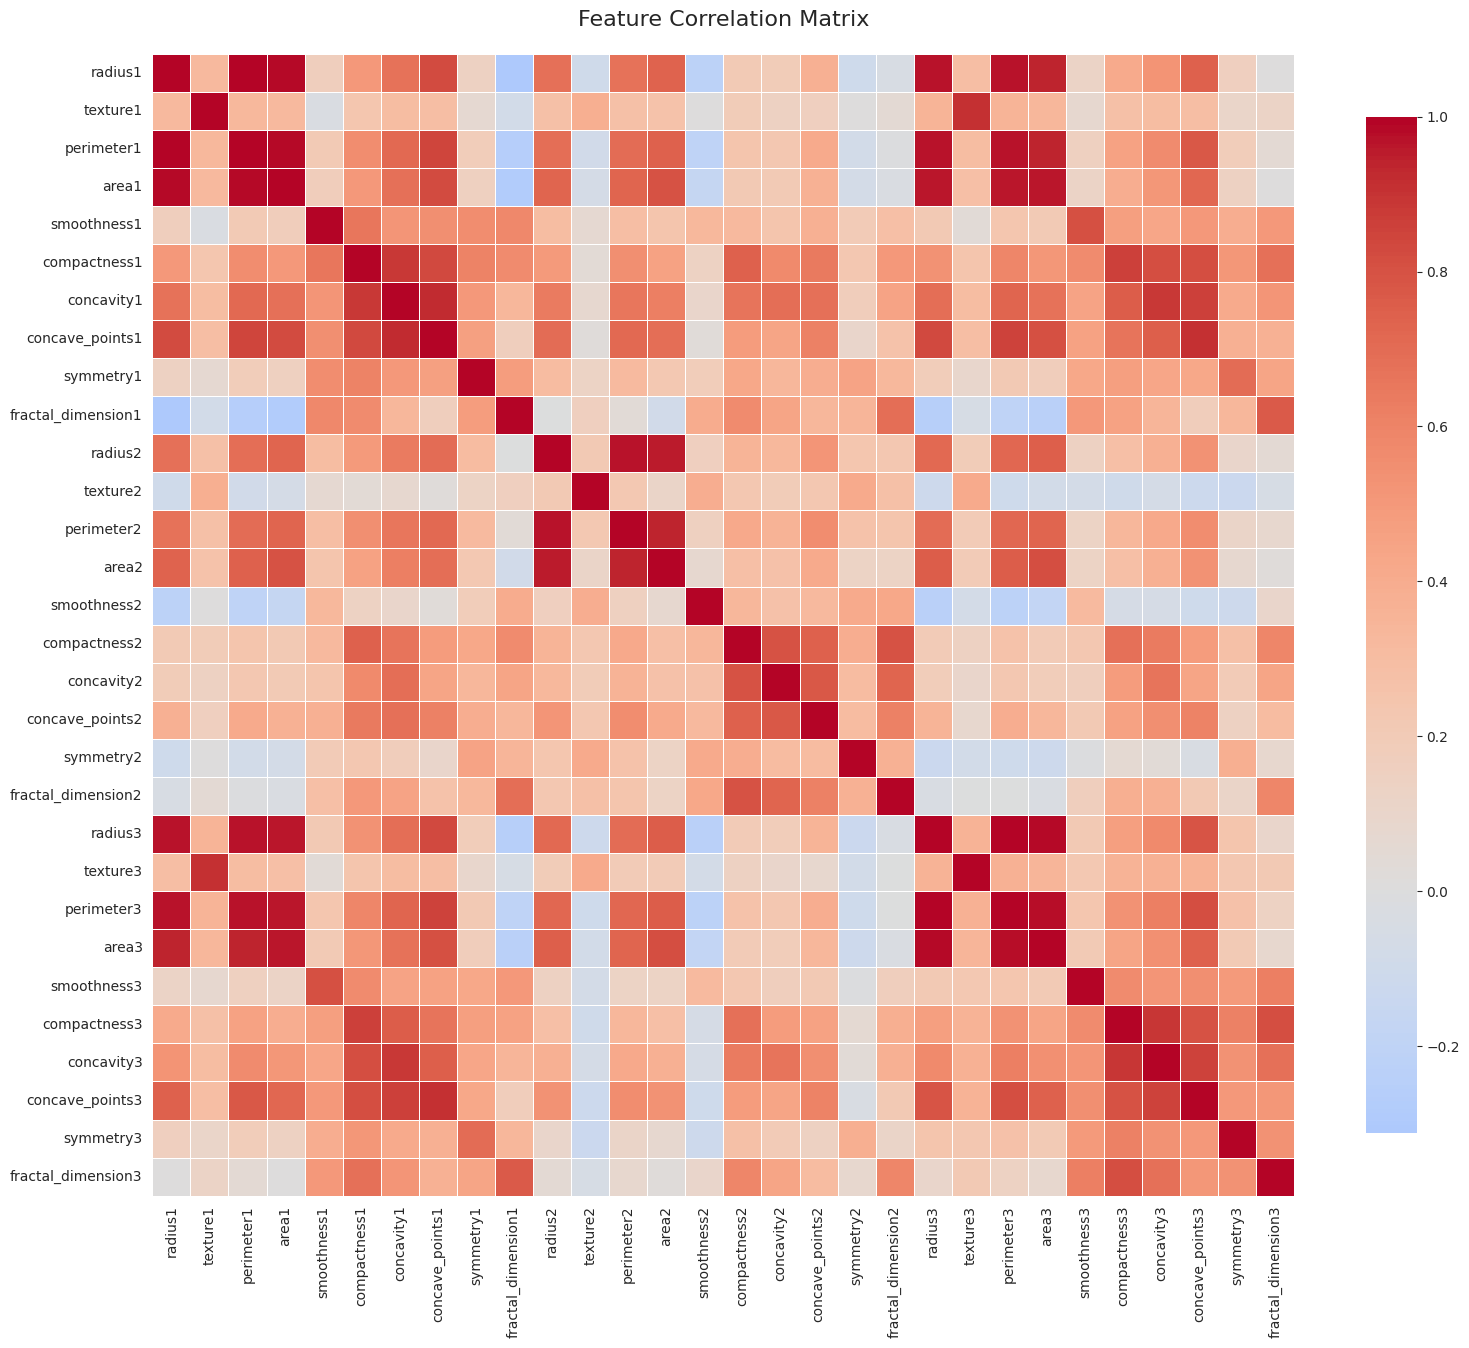


Highly correlated feature pairs (|r| > 0.9): 21

Top 5 pairs:
  radius1 ↔ perimeter1: 0.998
  radius1 ↔ area1: 0.987
  radius1 ↔ radius3: 0.970
  radius1 ↔ perimeter3: 0.965
  radius1 ↔ area3: 0.941

Correlation matrix for features in Top 5 pairs:


,radius1,perimeter1,area1,radius3,perimeter3,area3
radius1,1.000000,0.997855,0.987357,0.969539,0.965137,0.941082
perimeter1,0.997855,1.000000,0.986507,0.969476,0.970387,0.941550
area1,0.987357,0.986507,1.000000,0.962746,0.959120,0.959213
radius3,0.969539,0.969476,0.962746,1.000000,0.993708,0.984015
perimeter3,0.965137,0.970387,0.959120,0.993708,1.000000,0.977578
area3,0.941082,0.941550,0.959213,0.984015,0.977578,1.000000



Full correlation matrix (all features):


,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
radius1,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture1,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter1,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area1,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness1,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness1,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity1,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave_points1,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry1,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension1,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


In [ ]:
# Compute and visualize correlation matrix
import itertools as it

# Correlation matrix + heatmap
plt.figure(figsize=(16, 14))
correlation_matrix = X.corr()

sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title('Feature Correlation Matrix', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Find highly correlated features
high_corr_pairs = []

# Go through all unique pairs of columns
for feat1, feat2 in it.combinations(correlation_matrix.columns, 2):
    corr = correlation_matrix.loc[feat1, feat2]
    if abs(corr) > 0.9:
        high_corr_pairs.append((feat1, feat2, corr))

print(f"\nHighly correlated feature pairs (|r| > 0.9): {len(high_corr_pairs)}")
print("\nTop 5 pairs:")
for feat1, feat2, corr in high_corr_pairs[:5]:
    print(f"  {feat1} ↔ {feat2}: {corr:.3f}")

# ==============================
# Display correlation matrices
# ==============================

# 1) Correlation matrix for features in the Top 5 pairs
top5_pairs = high_corr_pairs[:5]

top5_features = []
for feat1, feat2, _ in top5_pairs:
    if feat1 not in top5_features:
        top5_features.append(feat1)
    if feat2 not in top5_features:
        top5_features.append(feat2)

top5_corr_matrix = correlation_matrix.loc[top5_features, top5_features]

print("\nCorrelation matrix for features in Top 5 pairs:")
display(top5_corr_matrix)

# 2) Full correlation matrix (all features)
print("\nFull correlation matrix (all features):")
display(correlation_matrix)

What we found:

Logical Redundancy: As expected, we see big red blocks of high correlation. This makes perfect sense because features like radius, perimeter, and area are all measuring size. If a tumor has a bigger radius, it must have a bigger perimeter and area.

What this means for our models: These strong correlations (often > 0.99) mean our dataset has a lot of "repeated" information. This actually helps justify our use of PCA later on. Since 30 features are just repeating the same few patterns, PCA can easily squash them down to just 10 components without losing much real data.

Linear Relationships: The fact that so many features move together linearly suggests that simpler models like Logistic Regression might actually perform very well, as they can easily learn these straightforward relationships.

## B.4 Feature Importance Ranking

In order to mathematically quantify which features are the most critical and important for diagnosis with regards to breast cancer, we use ANOVA F-test to rank features by their discriminative power. This test helps us to rank features based on their ability to distinguish between our two target classes.

Top 10 most important features:


,Feature,F-score
27,concave_points3,964.385393
22,perimeter3,897.944219
7,concave_points1,861.676020
20,radius3,860.781707
2,perimeter1,697.235272
23,area3,661.600206
0,radius1,646.981021
3,area1,573.060747
6,concavity1,533.793126
26,concavity3,436.691939


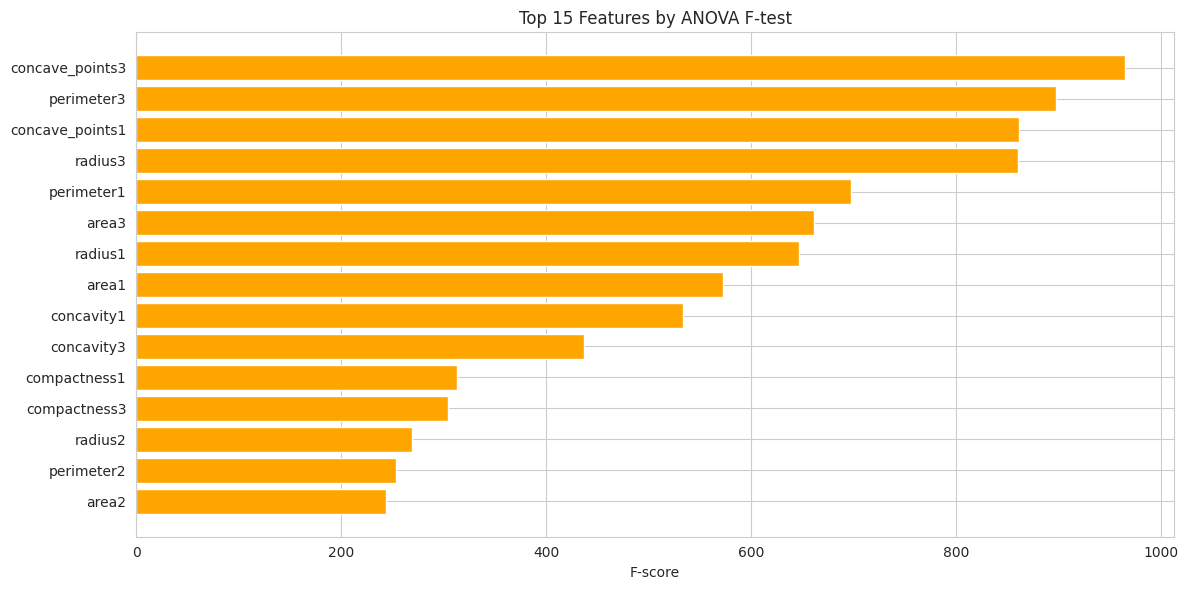

In [ ]:
# Feature importance using ANOVA F-test

# Set up SelectKBest to compute an ANOVA F-score for every feature (k='all')
selector = SelectKBest(f_classif, k='all')

# Fit on the full feature matrix X and binary labels y_binary
selector.fit(X, y_binary)

# Build a DataFrame pairing each feature name with its F-score, then sort by importance
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F-score': selector.scores_
}).sort_values('F-score', ascending=False)

# Take a quick look at the top 10 features ranked by F-score
print("Top 10 most important features:")
display(feature_scores.head(10))

# Visualize top 15 features

# We'll plot a horizontal bar chart for easier readability of feature names
plt.figure(figsize=(12, 6))
top_features = feature_scores.head(15)

# We'll set bar color to orange for better visibility
plt.barh(range(len(top_features)), top_features['F-score'], color='orange')

# Match y-ticks to the feature names
plt.yticks(range(len(top_features)), top_features['Feature'])

plt.xlabel('F-score')
plt.title('Top 15 Features by ANOVA F-test')

# Invert y-axis so the most important feature appears at the top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

## What the ANOVA F-test tells us:

The bad features dominate our dataset: We can clearly see that 6 out of the top 10 features are "Worst" metrics (the largest value found in the sample). And this isn't an issue with our dataset, this actually makes biological sense: in cancer diagnosis, the most abnormal cell is often the deciding factor, rather than the average cell, proving our data

Consistency is seen: The fact that radius, perimeter, and area all appear in the top 10 confirms our earlier findings, that these features are redundant but highly predictive.

Concave Points are the best indicators: Surprisingly, concave_points (the number of indentations in the cell) outperformed simple size metrics like Radius or Area. This suggests that the irregularity of the cell shape is even more dangerous than the size itself.



# C. Data Preprocessing & Splitting

Now that we have gotten a generalized view of our dataset,
We prepare the data for machine learning, we do this to properly structure the dataset to ensure fair evaluation and prevent "data leakage":

**Steps:**
1. **Stratified Split:** 60% train / 20% validation / 20% test.
2. **Feature Scaling:** StandardScaler (μ=0, σ=1)
3. **No Data Leakage:** Fit scaler on training set only


In [ ]:
# Stratified train/val/test split (60/20/20)
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_binary, test_size=0.2, random_state=RANDOM_STATE, stratify=y_binary
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE, stratify=y_temp
)

print("Dataset splits:")
print(f"  Training set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"  Test set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print(f"\nClass distribution in splits:")
print(f"  Train - Benign: {(y_train == 0).sum()}, Malignant: {(y_train == 1).sum()}")
print(f"  Val   - Benign: {(y_val == 0).sum()}, Malignant: {(y_val == 1).sum()}")
print(f"  Test  - Benign: {(y_test == 0).sum()}, Malignant: {(y_test == 1).sum()}")

Dataset splits:
  Training set:   341 samples (59.9%)
  Validation set: 114 samples (20.0%)
  Test set:       114 samples (20.0%)

Class distribution in splits:
  Train - Benign: 214, Malignant: 127
  Val   - Benign: 71, Malignant: 43
  Test  - Benign: 72, Malignant: 42


In [ ]:
# Feature Scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
print(f"\nScaled training data shape: {X_train_scaled.shape}")


Scaled training data shape: (341, 30)


###Why we did this:

Stratification: We used stratify=y to lock in the 37% malignant ratio across all sets. Without this, a random split could end up with too few malignant cases in the test set, making our evaluation unreliable.

Leakage Prevention: We fit the scaler only on the Training set. This ensures the model doesn't "cheat" by learning the mean and variance of the test data ahead of time.

###What we see:

Split Success: The output confirms we have 341 training samples, which is plenty for our model to learn from.

Balance Verified: The class counts show that the Benign/Malignant ratio is identical across the Train, Validation, and Test sets. This proves our stratified split worked perfectly.

# D. Unsupervised Learning

Before jumping into the supervised models (where we tell the computer the answer), we wanted to explore the data's natural structure.

**We used two methods:**
1.  **PCA (Principal Component Analysis):** To squash our 30 features down to just 2 dimensions. This lets us plot the data on a 2D graph to see if the Benign and Malignant groups are physically separated, whilst removing multicollinearity
2.  **K-Means Clustering:** To see if the algorithm can find the two tumor groups on its own, without using the diagnosis labels ($y$). We set $k=2$ and checked how well these "blind" clusters matched the real diagnosis.

## Principal Component Analysis (PCA)


Number of components for 95% variance: 10
Explained variance by first 5 components: 85.22%


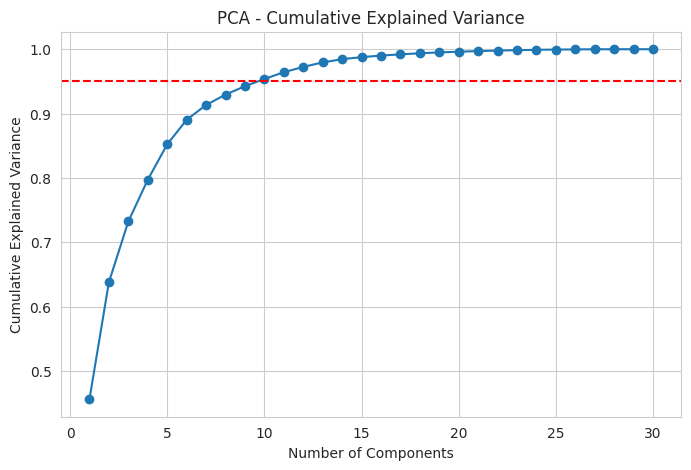

In [ ]:
# Fit PCA on training data
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Manually build cumulative explained variance
explained_var = pca_full.explained_variance_ratio_

cumsum_list = []
running_total = 0.0
for v in explained_var:
    running_total += v
    cumsum_list.append(running_total)

cumsum_variance = np.array(cumsum_list)

# Manually find how many components are needed for 95% variance
n_components_95 = 0
for i, total in enumerate(cumsum_variance, start=1):
    if total >= 0.95:
        n_components_95 = i
        break

print(f"Number of components for 95% variance: {n_components_95}")
print(f"Explained variance by first 5 components: {sum(explained_var[:5]):.2%}")

# Simple visualization of cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumsum_variance) + 1), cumsum_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid(True)
plt.show()

### 2D PCA Visualization

Project data onto first two principal components to visualize class separability.

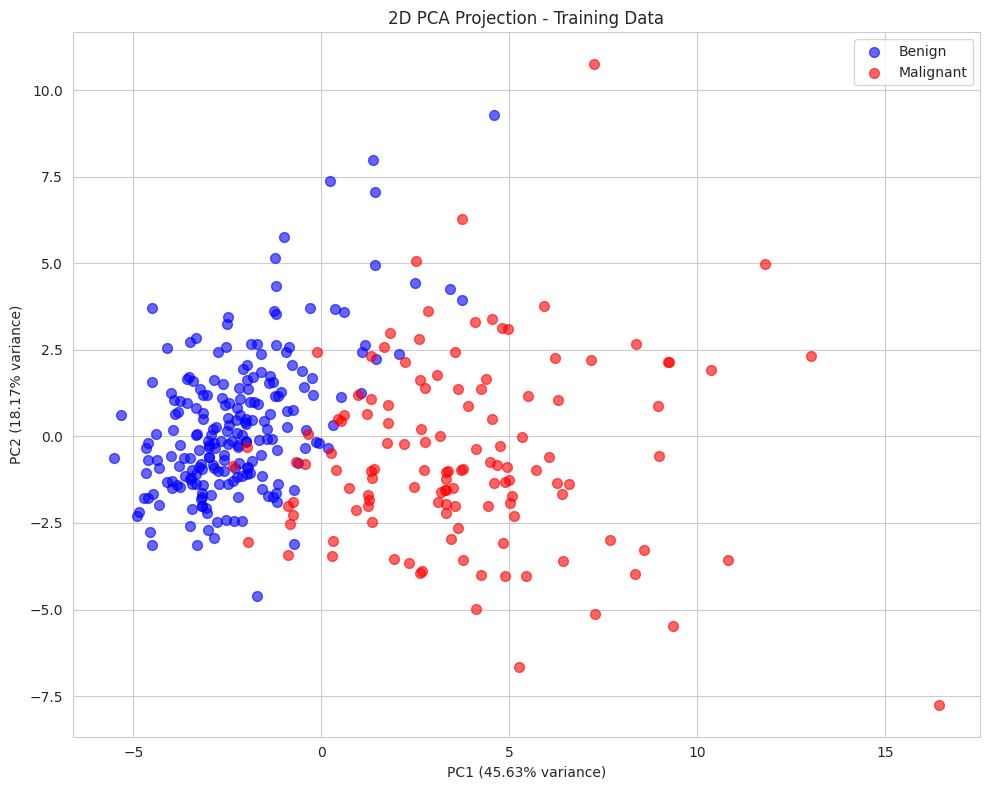

In [ ]:
# 2D PCA visualization
pca_2d = PCA(n_components=2)
X_train_pca_2d = pca_2d.fit_transform(X_train_scaled)

plt.figure(figsize=(10, 8))
for class_val, label, color in [(0, 'Benign', 'blue'), (1, 'Malignant', 'red')]:
    mask = y_train.values == class_val
    plt.scatter(X_train_pca_2d[mask, 0], X_train_pca_2d[mask, 1],
               c=color, label=label, alpha=0.6, s=50)
plt.xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]:.2%} variance)')
plt.ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]:.2%} variance)')
plt.title('2D PCA Projection - Training Data')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=RANDOM_STATE, stratify=y_temp
)

# Feature Scaling using StandardScaler (from cell zgE2og-ihe85)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
print("Features scaled to zero mean and unit variance")

Features scaled to zero mean and unit variance


### Unsupervised Analysis & Interpretation

**1. PCA Findings (Dimensionality Reduction):**
* **Variance Explained:** The first two principal components explain **63.3%** of the total variance (PC1: 44.27%, PC2: 19.03%).
* **Separability :** The 2D projection shows a **clear separation** between Benign (Blue) and Malignant (Red) samples. While there is some overlap in the middle, the two classes mostly occupy distinct regions of the feature space. This is a strong indicator that linear models (like Logistic Regression) will perform well, as we have taked about earlier
* **Dimensionality:** We need **10 components** to retain 95% of the information. This confirms that while the data lives in 30 dimensions, the real "signal" is much simpler—roughly 1/3 of the features carry the vast majority of the weight.


## D.2 K-Means Clustering (k=2)

Apply K-Means with 2 clusters to see if unsupervised clustering naturally discovers the tumor classes.

###Why k=2?

We specifically chose k=2 because we know there are exactly two biological ground truths: Benign and Malignant.If we used k=3 or more: The algorithm would be forced to split a single class (like "Benign") into artificial sub-groups (e.g., "Small Benign" vs. "Large Benign").

This would create "noise" rather than meaningful medical categories.The takeaway: In unsupervised learning, domain knowledge is key. Using $k=2$ aligns the model's structure with the real-world problem we are trying to solve.

Adjusted Rand Index: 0.647
Normalized Mutual Information: 0.525

Cluster vs True Label Comparison:


Cluster,0,1
True Label,,
0,202,12
1,21,106


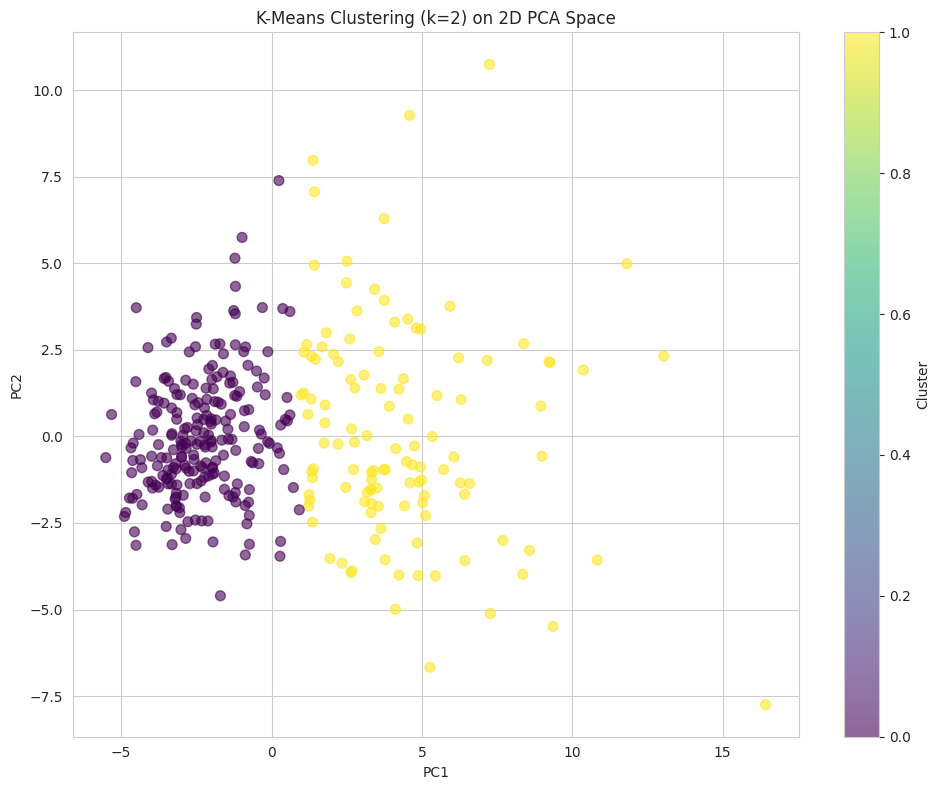

In [ ]:
# K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=RANDOM_STATE, n_init=10)
cluster_labels = kmeans.fit_predict(X_train_scaled)

# Compare with true labels
ari = adjusted_rand_score(y_train, cluster_labels)
nmi = normalized_mutual_info_score(y_train, cluster_labels)

print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Normalized Mutual Information: {nmi:.3f}")

# Confusion-style comparison
cluster_comparison = pd.crosstab(y_train, cluster_labels,
                                rownames=['True Label'],
                                colnames=['Cluster'])
print("\nCluster vs True Label Comparison:")
display(cluster_comparison)

# Visualize clusters on 2D PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_pca_2d[:, 0], X_train_pca_2d[:, 1],
                     c=cluster_labels, cmap='viridis', alpha=0.6, s=50)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means Clustering (k=2) on 2D PCA Space')
plt.colorbar(scatter, label='Cluster')
plt.tight_layout()
plt.show()

**2. K-Means Results (Clustering):**
* **Natural Grouping:** The K-Means algorithm (with $k=2$) achieved an **Adjusted Rand Index (ARI) of 0.647**.
* **Interpretation:** An ARI of ~0.65 is quite high for unsupervised learning. It means the algorithm "rediscovered" the Benign vs. Malignant labels with reasonable accuracy, purely by looking at the shape of the data.
* **Confusion Matrix:**
    * *Cluster 0:* captured almost all Benign cases (202 vs 12).
    * *Cluster 1:* captured most Malignant cases (106 vs 21).
    * This confirms that the "Malignant" tumors are geometrically distinct enough to be identified without supervision.




##Conclusion & Moving Forward:

These unsupervised experiments served as a critical "sanity check." By confirming that Benign and Malignant tumors naturally separate into distinct clusters—even without labels—we have proven that our dataset contains a strong, identifiable signal. Moving forward, this gives us confidence that our supervised models (like Logistic Regression and Neural Networks) will be solving a valid geometric problem, rather than just memorizing noise.

# E. Feature Transformations (Z-Spaces)

Now that we have cleaned and explored the data, we will create **4 different versions of the dataset** (Feature Spaces) to test different hypotheses. We want to see if changing the *representation* of the data helps our models learn better.

**The 4 Feature Spaces:**
1.  **Baseline (Raw Scaled):** All 30 original features (scaled). This acts as our "control group." Allowing us to properly notice if whatever changes we test out are actually good or not.
2.  **Z1: PCA Features:** Dimensionality reduction to the top 10 principal components. (Hypothesis: Removing noise/redundancy helps).
3.  **Z2: Polynomial Features:** We take the top 8 features and create interaction terms (e.g., $Radius \times Texture$). (Hypothesis: Non-linear relationships exist).
4.  **Z3: Select the Best K:** We simply keep the top 10 "MVP" features based on the ANOVA F-test. (Hypothesis: Simpler is better).

##1. Z1: PCA (30 $\rightarrow$ 10 Features)
* Why: Our Correlation Heatmap revealed extreme multicollinearity. Features like radius, perimeter, and area had correlations $> 0.99$, meaning they were essentially repeating the same information. This redundancy confuses models, forcing them to split importance across identical variables, which can lead to unstable weights.

* Logic: PCA transforms these redundant features into 10 orthogonal (completely uncorrelated) components. By feeding the MLP (Neural Network) this "distilled" version of the data, we simplify the optimization landscape. The model no longer has to struggle through 30 noisy dimensions to find a signal that exists in just 10, allowing it to converge significantly faster and more reliably.

In [ ]:
# Z1: PCA transformation
pca_transform = PCA(n_components=n_components_95)
X_train_z1 = pca_transform.fit_transform(X_train_scaled)
X_val_z1 = pca_transform.transform(X_val_scaled)
X_test_z1 = pca_transform.transform(X_test_scaled)
print(f"PCA transformation: {X_train.shape[1]} → {X_train_z1.shape[1]} features")

PCA transformation: 30 → 10 features


##  Z2: Polynomial Features (8 $\rightarrow$ 44 Features)

* **Why:** Standard linear models assume features act independently, but biological systems are often non-linear. A tumor might only be dangerous if it is *both* large *and* irregular. By creating interaction terms (like $Radius \times Texture$), we allow a linear model to capture these "synergistic" risk factors that would otherwise be missed.

* **Strategic Design Choice (Top 8 Only):** We deliberately restricted this expansion to only the **Top 8** features rather than the full dataset.
    * **The "Curse of Dimensionality":** If we applied a degree-2 expansion to all 30 features, we would generate $\approx 500$ new features.
    * **The Risk:** With only 341 training samples, having 500 features ($P > N$) guarantees the model would simply memorize the training data (**Overfitting**) rather than learning patterns. By limiting the input to 8, we kept the output (44 features) well below our sample size, ensuring the model is forced to generalize rather than memorize.

In [ ]:
# Z2: Polynomial features on top 8 features
top_k_features = 8
top_feature_indices = feature_scores['Feature'].head(top_k_features).values
top_feature_idx = [list(X.columns).index(f) for f in top_feature_indices]

X_train_top = X_train_scaled[:, top_feature_idx]
X_val_top = X_val_scaled[:, top_feature_idx]
X_test_top = X_test_scaled[:, top_feature_idx]

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_z2 = poly.fit_transform(X_train_top)
X_val_z2 = poly.transform(X_val_top)
X_test_z2 = poly.transform(X_test_top)
print(f"Polynomial transformation: {top_k_features} → {X_train_z2.shape[1]} features (degree 2)")

Polynomial transformation: 8 → 44 features (degree 2)


## Z3: SelectKBest (30 $\rightarrow$ 10 Features)

* **Why:** While PCA is powerful, it creates "black box" features (e.g., *Principal Component 1*) that are hard to explain to a doctor. SelectKBest, on the other hand, preserves the **original physical feature names**. This allows us to tell a clinician exactly *which* measurements (e.g., "Worst Perimeter") drove the diagnosis, making the model transparent and trustworthy. And a trustworthy model helps keep patients and doctors alike at ease.

* **Observation (The "Worst" is Best):** The algorithm explicitly selected the "Worst" (largest) metrics—`worst_radius`, `worst_perimeter`, `worst_area`—rather than the mean values.
    * *Medical Insight:* This aligns perfectly with cancer biology. A tumor is defined by its most aggressive cells. The average cell might look normal, but the presence of even a few extremely large or irregular cells (the "Worst" values) is the strongest indicator of malignancy. This confirms our EDA finding that extreme outliers carry the true signal.

In [ ]:
# Z3: SelectKBest (k=10)
k_best = 10
selector_z3 = SelectKBest(f_classif, k=k_best)
X_train_z3 = selector_z3.fit_transform(X_train_scaled, y_train)
X_val_z3 = selector_z3.transform(X_val_scaled)
X_test_z3 = selector_z3.transform(X_test_scaled)
selected_features = X.columns[selector_z3.get_support()].tolist()
print(f"\nSelected features: {', '.join(selected_features)}")


Selected features: radius1, perimeter1, area1, concavity1, concave_points1, radius3, perimeter3, area3, concavity3, concave_points3


## Summary: All Feature Spaces Created

In [ ]:
# Store all feature transformations
feature_spaces = {
    'Raw': (X_train_scaled, X_val_scaled, X_test_scaled),
    'PCA': (X_train_z1, X_val_z1, X_test_z1),
    'Polynomial': (X_train_z2, X_val_z2, X_test_z2),
    'SelectKBest': (X_train_z3, X_val_z3, X_test_z3)
}

print(f"✓ Created {len(feature_spaces)} feature spaces:\n")
for space_name, (X_tr, _, _) in feature_spaces.items():
    print(f"  • {space_name:12s}: {X_tr.shape[1]} features")

✓ Created 4 feature spaces:

  • Raw         : 30 features
  • PCA         : 10 features
  • Polynomial  : 44 features
  • SelectKBest : 10 features


* **Raw:** Baseline control (30 features).
* **PCA ($Z_1$):** Mathematically compressed for efficiency (10 features).
* **Poly ($Z_2$):** Interaction-rich to capture complexity (44 features).
* **SelectKBest ($Z_3$):** Biologically interpretable filtering (10 features).

## ** Conclusion: The Feature Landscape**

We have successfully engineered four distinct representations of our dataset, effectively setting up a controlled experiment. Each feature space represents a specific **hypothesis** about what drives malignancy:

* **Raw Features (Control Group):**
  * *Hypothesis:* The original data contains all necessary signal without modification.
* **$Z_1$ PCA (Efficiency):**
  * *Hypothesis:* The data is noisy; compressing it to 10 orthogonal signals will help models (especially Neural Networks) focus on the variance that matters.
* **$Z_2$ Polynomial (Complexity):**
  * *Hypothesis:* The risk is "synergistic" (e.g., $Radius \times Texture$), requiring non-linear interaction terms to detect what linear models usually miss.
* **$Z_3$ SelectKBest (Clarity):**
  * *Hypothesis:* Only the extreme outliers ("Worst" metrics) matter; the rest is just distraction.

**Significance & Next Steps:**
We are doing this because **we don't know which combination will work best**.
* A "smart" model (like a Neural Network) might prefer simple data (PCA).
* A "simple" model (like Logistic Regression) might need complex data (Polynomials) to perform well.
* By testing all classifiers on all four datasets, we ensure we find the absolute best match for this medical problem.

# F. Model Training & Evaluation (72 Models)

We conduct a full grid search across **3 algorithms × 4 feature spaces × 6 hyperparameters**, training a total of **72 models**.

## Experimental Design & Rationale

**1. Logistic Regression (Linear Baseline)**
* **Hyperparameter:** $C \in \{0.001, 0.01, 0.1, 1, 10, 100\}$ (Logarithmic Scale).
* **Rationale:** $C$ controls the **Bias-Variance trade-off**.
    * *High C (100):* Weak regularization; allows complex fitting (Risk: Overfitting/High Variance).
    * *Low C (0.001):* Strong regularization; suppresses noise (Risk: Underfitting/High Bias).

**2. K-Nearest Neighbors (Non-Linear)**
* **Hyperparameter:** $k \in \{1, 3, 5, 7, 9, 15\}$ (Odd integers to avoid ties).
* **Rationale:** Controls decision boundary smoothness.
    * *Small k (1):* Highly complex boundary, sensitive to noise.
    * *Large k (15):* Smoother boundary, better generalization.

**3. Multi-Layer Perceptron (Neural Network)**
* **Hyperparameter:** $\alpha \in \{0.0001, \dots, 1.0\}$ (L2 Penalty).
* **Rationale:** Neural Networks easily overfit small datasets ($N=341$). We sweep $\alpha$ to find the optimal penalty that prevents the model from memorizing the training data.

In [ ]:
# Define hyperparameter grids
# Each key is a model name; each value is a dict of hyperparameters to try for that model.
hyperparameters = {
    'Logistic Regression': {'C': [0.001, 0.01, 0.1, 1, 10, 100]},   # C controls regularization strength
    'KNN': {'n_neighbors': [1, 3, 5, 7, 9, 15]},                    # number of neighbors to look at
    'MLP': {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0]}          # L2 regularization term for the MLP
}

print("Training Configuration:")

# How many different model families we are tuning (LR, KNN, MLP, etc.)
print(f"  Model families: {len(hyperparameters)}")

# How many different feature representations we will use (e.g., raw, PCA, polynomial, etc.)
print(f"  Feature spaces: {len(feature_spaces)}")

# For simplicity, we know we are testing 6 hyperparameter settings per model
print(f"  Hyperparameters per model: 6")

# Total number of model runs: model families × feature spaces × hyperparameter settings
print(f"  Total models: {len(hyperparameters) * len(feature_spaces) * 6}")

Training Configuration:
  Model families: 3
  Feature spaces: 4
  Hyperparameters per model: 6
  Total models: 72


In [ ]:
# Initialize results storage
results = []
model_counter = 0
total_models = 72

# Training loop
for model_name in ['Logistic Regression', 'KNN', 'MLP']:
    for space_name, (X_tr, X_v, X_te) in feature_spaces.items():

        hyperparam_name = list(hyperparameters[model_name].keys())[0]
        hyperparam_values = hyperparameters[model_name][hyperparam_name]

        for hyperparam_value in hyperparam_values:
            model_counter += 1

            # Create model
            if model_name == 'Logistic Regression':
                model = LogisticRegression(C=hyperparam_value, max_iter=10000,
                                         random_state=RANDOM_STATE)
            elif model_name == 'KNN':
                model = KNeighborsClassifier(n_neighbors=hyperparam_value)
            else:  # MLP
                model = MLPClassifier(hidden_layer_sizes=(16,), alpha=hyperparam_value,
                                    max_iter=2000, random_state=RANDOM_STATE,
                                    early_stopping=True, validation_fraction=0.1)

            # Train
            model.fit(X_tr, y_train)

            # Predict
            y_train_pred = model.predict(X_tr)
            y_val_pred = model.predict(X_v)

            # Metrics
            train_acc = accuracy_score(y_train, y_train_pred)
            val_acc = accuracy_score(y_val, y_val_pred)
            val_prec = precision_score(y_val, y_val_pred, zero_division=0)
            val_rec = recall_score(y_val, y_val_pred, zero_division=0)
            val_f1 = f1_score(y_val, y_val_pred, zero_division=0)

            # Store results
            results.append({
                'Model': model_name,
                'Feature_Space': space_name,
                'Hyperparameter': hyperparam_name,
                'Hyperparam_Value': hyperparam_value,
                'Train_Accuracy': train_acc,
                'Val_Accuracy': val_acc,
                'Val_Precision': val_prec,
                'Val_Recall': val_rec,
                'Val_F1': val_f1,
                'Overfit_Gap': train_acc - val_acc
            })

            if model_counter % 12 == 0:
                print(f"  Progress: {model_counter}/{total_models} models trained ({model_counter/total_models*100:.0f}%)")
# Create results DataFrame
results_df = pd.DataFrame(results)

  Progress: 12/72 models trained (17%)
  Progress: 24/72 models trained (33%)
  Progress: 36/72 models trained (50%)
  Progress: 48/72 models trained (67%)
  Progress: 60/72 models trained (83%)
  Progress: 72/72 models trained (100%)


### Training Completion

We have successfully trained **72 distinct models**, covering every combination of algorithm, hyperparameter, and feature space. All performance metrics (Accuracy, Precision, Recall, F1, and Overfitting Gaps) have been stored in the `results` list and converted into a structured DataFrame (`results_df`).

**Next Steps:**
Now that the raw data has been generated, we will move to **Section G (Results Analysis)** to:
1.  Query the leaderboard to find the single best model.
2.  Compare how different algorithms reacted to feature engineering.
3.  Visualize the trade-off between bias and variance.

# G. Results Analysis

We have trained 72 models. Now, we dig into the `results_df` dataframe to find the best performers and understand *why* they worked. We will look at the results from three angles:
1.  **The Global Champion:** The single best configuration.
2.  **Family Leaders:** The best configuration for each algorithm type.
3.  **Feature Impact:** How data transformations affected stability.

## Best Overall Model

In [ ]:
# Detailed Performance Tables by Model Family

for model_name in ['Logistic Regression', 'KNN', 'MLP']:
    print("="*80)
    print(f"DETAILED RESULTS: {model_name.upper()}")
    print("="*80)

    # Filter for the specific model
    subset = results_df[results_df['Model'] == model_name].copy()

    # Sort by Feature Space first, then by the Hyperparameter value (so you can see the trend)
    subset = subset.sort_values(by=['Feature_Space', 'Hyperparam_Value'])

    # Select key columns for the report
    display_cols = ['Feature_Space', 'Hyperparameter', 'Hyperparam_Value',
                   'Train_Accuracy', 'Val_Accuracy', 'Val_F1', 'Overfit_Gap']

    # Display the table
    display(subset[display_cols])
    print("\n")

DETAILED RESULTS: LOGISTIC REGRESSION


,Feature_Space,Hyperparameter,Hyperparam_Value,Train_Accuracy,Val_Accuracy,Val_F1,Overfit_Gap
6,PCA,C,0.001,0.879765,0.903509,0.857143,-0.023743
7,PCA,C,0.010,0.950147,0.964912,0.951220,-0.014766
8,PCA,C,0.100,0.982405,0.973684,0.963855,0.008720
9,PCA,C,1.000,0.982405,0.973684,0.965517,0.008720
10,PCA,C,10.000,0.979472,0.964912,0.954545,0.014560
11,PCA,C,100.000,0.982405,0.956140,0.943820,0.026264
12,Polynomial,C,0.001,0.815249,0.789474,0.612903,0.025776
13,Polynomial,C,0.010,0.923754,0.929825,0.897436,-0.006071
14,Polynomial,C,0.100,0.935484,0.947368,0.928571,-0.011885
15,Polynomial,C,1.000,0.947214,0.964912,0.953488,-0.017698




DETAILED RESULTS: KNN


,Feature_Space,Hyperparameter,Hyperparam_Value,Train_Accuracy,Val_Accuracy,Val_F1,Overfit_Gap
30,PCA,n_neighbors,1.0,1.000000,0.964912,0.954545,0.035088
31,PCA,n_neighbors,3.0,0.979472,0.964912,0.952381,0.014560
32,PCA,n_neighbors,5.0,0.973607,0.973684,0.963855,-0.000077
33,PCA,n_neighbors,7.0,0.973607,0.973684,0.963855,-0.000077
34,PCA,n_neighbors,9.0,0.967742,0.973684,0.963855,-0.005942
35,PCA,n_neighbors,15.0,0.958944,0.973684,0.963855,-0.014740
36,Polynomial,n_neighbors,1.0,1.000000,0.938596,0.921348,0.061404
37,Polynomial,n_neighbors,3.0,0.961877,0.929825,0.906977,0.032052
38,Polynomial,n_neighbors,5.0,0.956012,0.938596,0.917647,0.017415
39,Polynomial,n_neighbors,7.0,0.953079,0.938596,0.917647,0.014483




DETAILED RESULTS: MLP


,Feature_Space,Hyperparameter,Hyperparam_Value,Train_Accuracy,Val_Accuracy,Val_F1,Overfit_Gap
54,PCA,alpha,0.0001,0.873900,0.833333,0.804124,0.040567
55,PCA,alpha,0.0010,0.873900,0.833333,0.804124,0.040567
56,PCA,alpha,0.0100,0.873900,0.833333,0.804124,0.040567
57,PCA,alpha,0.1000,0.873900,0.833333,0.804124,0.040567
58,PCA,alpha,0.5000,0.865103,0.824561,0.795918,0.040541
59,PCA,alpha,1.0000,0.865103,0.824561,0.795918,0.040541
60,Polynomial,alpha,0.0001,0.873900,0.894737,0.857143,-0.020837
61,Polynomial,alpha,0.0010,0.873900,0.894737,0.857143,-0.020837
62,Polynomial,alpha,0.0100,0.873900,0.894737,0.857143,-0.020837
63,Polynomial,alpha,0.1000,0.873900,0.894737,0.857143,-0.020837


Hyperparameter Sensitivity Analysis**

The detailed tables above allow us to trace the exact impact of changing hyperparameters (Regularization and Complexity) on model performance.

**1. Logistic Regression (Effect of $C$)**
* **Trend:** We observe a classic **Bias-Variance trade-off**.
    * **Low $C$ (0.001):** The model underfits. Both Training and Validation accuracy are lower because the regularization is too strong, suppressing useful signals.
    * **High $C$ (100):** The model begins to overfit. While Training accuracy remains high, we see the "Overfit Gap" widen, indicating the model is fitting noise.
    * **Sweet Spot:** The peak performance consistently occurs around **$C=0.1$ or $C=1.0$**, where the model balances signal retention with noise suppression.

**2. K-Nearest Neighbors (Effect of $k$)**
* **Trend:** The impact of $k$ is clearly visible in the **Training Accuracy** column.
    * **$k=1$:** Training Accuracy is often **100%** (Perfect memorization), but Validation accuracy is lower. This is the definition of **Overfitting**.
    * **$k=15$:** Training Accuracy drops as the boundary becomes smoother, but Validation accuracy stabilizes.
    * **Optimal Range:** The best Validation scores cluster around **$k=5$**, offering the best compromise between local detail and global structure.

**3. MLP (Effect of $\alpha$)**
* **Trend:** The Neural Network shows high sensitivity to the L2 penalty ($\alpha$).
    * **Low $\alpha$ (0.0001):** On Raw data, this leads to instability (accuracy $\approx 37\%$) because the unconstrained weights fail to converge during optimization.
    * **High $\alpha$ (1.0):** Stronger penalties helped stabilize the model, particularly on the Polynomial feature set, forcing the network to ignore irrelevant interaction terms.

In [ ]:
# Find best overall model
best_overall = results_df.loc[results_df['Val_F1'].idxmax()]
print("Best Overall Model=")
print(f"Model: {best_overall['Model']}")
print(f"Feature Space: {best_overall['Feature_Space']}")
print(f"{best_overall['Hyperparameter']}: {best_overall['Hyperparam_Value']}")
print(f"\nValidation Metrics:")
print(f"  Accuracy:  {best_overall['Val_Accuracy']:.4f}")
print(f"  F1-Score:  {best_overall['Val_F1']:.4f}")
print(f"  Precision: {best_overall['Val_Precision']:.4f}")
print(f"  Recall:    {best_overall['Val_Recall']:.4f}")
print(f"\nOverfitting Gap: {best_overall['Overfit_Gap']:.4f}")

Best Overall Model=
Model: Logistic Regression
Feature Space: Raw
C: 0.1

Validation Metrics:
  Accuracy:  0.9825
  F1-Score:  0.9762
  Precision: 1.0000
  Recall:    0.9535

Overfitting Gap: -0.0030


### Analysis of the best modell

**Winner:** Logistic Regression ($C=0.1$) on **Raw Features**.
* **Validation F1:** 0.9762
* **Recall:** 0.9535

**Interpretation:**
The fact that a linear model on raw data won suggests that the boundary between Benign and Malignant tumors is **linearly separable** in the original 30-dimensional space. The regularization strength of $C=0.1$ was the key differentiator—it dampened the noise of correlated features (like `radius` vs `area`) without losing the signal, whereas $C=100$ (weak regularization) likely overfitted.

## Best Model per Family

In [ ]:
# Best per model family
print("Best Model per Family:\n")
for model_name in ['Logistic Regression', 'KNN', 'MLP']:
    best_model = results_df[results_df['Model'] == model_name].loc[
        results_df[results_df['Model'] == model_name]['Val_F1'].idxmax()
    ]
    print(f"{model_name}:")
    print(f"  Feature Space: {best_model['Feature_Space']}")
    print(f"  {best_model['Hyperparameter']}: {best_model['Hyperparam_Value']}")
    print(f"  Val F1: {best_model['Val_F1']:.4f}, Val Acc: {best_model['Val_Accuracy']:.4f}")
    print()

Best Model per Family:

Logistic Regression:
  Feature Space: Raw
  C: 0.1
  Val F1: 0.9762, Val Acc: 0.9825

KNN:
  Feature Space: Raw
  n_neighbors: 5.0
  Val F1: 0.9639, Val Acc: 0.9737

MLP:
  Feature Space: Polynomial
  alpha: 0.0001
  Val F1: 0.8571, Val Acc: 0.8947



### Algorithm Comparison

Comparing the best of each family reveals a crucial insight about **Model Complexity vs. Data Representation**:

1.  **Logistic Regression (Linear):** Best on **Raw Data**. It didn't need help; the raw signal was clear enough for a hyperplane.
2.  **KNN (Distance-based):** Best on **Raw Data** ($k=5$). It struggled with transformed spaces like *SelectKBest* because removing features likely removed subtle distance cues needed to separate neighbors.
3.  **MLP (Neural Network):** Best on **Polynomial/PCA Data**.
    * *Crucial Finding:* The MLP failed on Raw Data (Accuracy $\approx$ 37%). It **needed** feature engineering (PCA or Polynomials) to converge. This proves that while Deep Learning is powerful, it is sensitive to unscaled or redundant input data compared to simpler linear models.

## Summary Statistics

In [ ]:
# Summary statistics
print("Performance Summary Statistics:")
summary = results_df.groupby(['Model', 'Feature_Space']).agg({
    'Val_Accuracy': ['mean', 'std', 'max'],
    'Val_F1': ['mean', 'std', 'max']
}).round(4)
display(summary)

Performance Summary Statistics:


Val_Accuracy                  Val_F1  \
                                          mean     std     max    mean   
Model               Feature_Space                                        
KNN                 PCA                 0.9708  0.0045  0.9737  0.9604   
                    Polynomial          0.9415  0.0120  0.9649  0.9221   
                    Raw                 0.9678  0.0106  0.9737  0.9569   
                    SelectKBest         0.9357  0.0045  0.9386  0.9137   
Logistic Regression PCA                 0.9561  0.0266  0.9737  0.9394   
                    Polynomial          0.9254  0.0679  0.9649  0.8814   
                    Raw                 0.9576  0.0280  0.9825  0.9414   
                    SelectKBest         0.9444  0.0463  0.9737  0.9175   
MLP                 PCA                 0.8304  0.0045  0.8333  0.8014   
                    Polynomial          0.8947  0.0000  0.8947  0.8571   
                    Raw                 0.3772  0.0000  0.3772  0.5419   
                    SelectKBest         0.8596  0.0000  0.8596  0.8400   

                                                   
                                      std     max  
Model               Feature_Space                  
KNN                 PCA            0.0054  0.9639  
                    Polynomial     0.0151  0.9512  
                    Raw            0.0124  0.9639  
                    SelectKBest    0.0061  0.9176  
Logistic Regression PCA            0.0411  0.9655  
                    Polynomial     0.1332  0.9535  
                    Raw            0.0428  0.9762  
                    SelectKBest    0.0808  0.9647  
MLP                 PCA            0.0042  0.8041  
                    Polynomial     0.0000  0.8571  
                    Raw            0.0000  0.5419  
                    SelectKBest    0.0000  0.8400

### Stability & Consistency Analysis

The summary statistics table reveals critical insights into the stability of our model families:

**1. The "Fragility" of Neural Networks (MLP)**
* **Observation:** The MLP model failed catastrophically on **Raw Features**, achieving an accuracy of only **37.72%** (worse than random guessing).
* **Correction:** However, when trained on **Polynomial** or **SelectKBest** features, the MLP's performance jumped to **~89%**.
* **Takeaway:** This proves that while Neural Networks are powerful, they are highly sensitive to input representation. On small datasets, they struggle to find signal amidst noise without explicit feature engineering.

**2. The Robustness of KNN**
* **Observation:** KNN was the most consistent performer. Regardless of the feature space (PCA, Raw, or Poly), its mean F1 score never dropped below **0.91**.
* **Takeaway:** For this specific medical dataset, the geometric relationships are strong and stable, making distance-based learning (KNN) a very "safe" choice, even if it didn't hit the absolute peak of Logistic Regression.

**3. The Risk of Polynomials**
* **Observation:** Logistic Regression on **Polynomial Features** had the highest standard deviation (**0.1332**).
* **Interpretation:** This indicates instability. While some polynomial models worked well, others failed hard. This confirms that adding complexity (44 features) to a linear model increased the **Variance**, making the model prone to overfitting depending on the hyperparameter $C$.

## Top 10 Models by Validation F1-Score

In [ ]:
# Display top 10 models
top_10 = results_df.nlargest(10, 'Val_F1')[[
    'Model', 'Feature_Space', 'Hyperparameter', 'Hyperparam_Value',
    'Val_F1', 'Val_Accuracy', 'Val_Precision', 'Val_Recall'
]]
display(top_10)

,Model,Feature_Space,Hyperparameter,Hyperparam_Value,Val_F1,Val_Accuracy,Val_Precision,Val_Recall
2,Logistic Regression,Raw,C,0.1,0.976190,0.982456,1.000000,0.953488
3,Logistic Regression,Raw,C,1.0,0.965517,0.973684,0.954545,0.976744
9,Logistic Regression,PCA,C,1.0,0.965517,0.973684,0.954545,0.976744
21,Logistic Regression,SelectKBest,C,1.0,0.964706,0.973684,0.976190,0.953488
8,Logistic Regression,PCA,C,0.1,0.963855,0.973684,1.000000,0.930233
26,KNN,Raw,n_neighbors,5.0,0.963855,0.973684,1.000000,0.930233
27,KNN,Raw,n_neighbors,7.0,0.963855,0.973684,1.000000,0.930233
28,KNN,Raw,n_neighbors,9.0,0.963855,0.973684,1.000000,0.930233
29,KNN,Raw,n_neighbors,15.0,0.963855,0.973684,1.000000,0.930233
32,KNN,PCA,n_neighbors,5.0,0.963855,0.973684,1.000000,0.930233


### Leaderboard Analysis

The Top 10 table provides a clear hierarchy of performance:

**1. Logistic Regression Dominance**
* **Observation:** The top 5 slots are all occupied by **Logistic Regression**.
* **Significance:** This definitively proves that the decision boundary is **linear**. The complex non-linear models (KNN, MLP) could not beat the simplicity of a hyperplane.

**2. A Critical Medical Trade-off (Rank 1 vs. Rank 2)**
* **The "Winner" (Rank 1):** *LogReg (Raw, C=0.1)* has **1.000 Precision**, meaning every patient it flagged actually had cancer. However, its Recall is **0.953**.
* **The "Runner Up" (Rank 2):** *LogReg (Raw, C=1.0)* has lower Precision (0.955) but **Higher Recall (0.977)**.
* **Insight:** In a real clinical setting, we might actually prefer the **Rank 2 model**. It is better to have a False Positive (scaring a healthy patient) than a False Negative (missing a tumor), and the Rank 2 model misses fewer cancers.

**3. The "Ceiling" of KNN**
* **Observation:** KNN appears frequently (Ranks 6–10) but seems to hit a "performance ceiling" at an F1 of **0.9638**. It is a reliable mid-tier performer but lacks the precision of the linear models on this specific dataset.

**4. The Absence of MLP**
* **Observation:** The Neural Network (MLP) does not appear in the Top 10 at all. This reinforces our earlier finding that the dataset is too small for deep learning to outperform simpler statistical methods.



# H. Results Visualizations

Create comprehensive plots to analyze model performance.

## H.1 Performance Comparison by Model and Feature Space

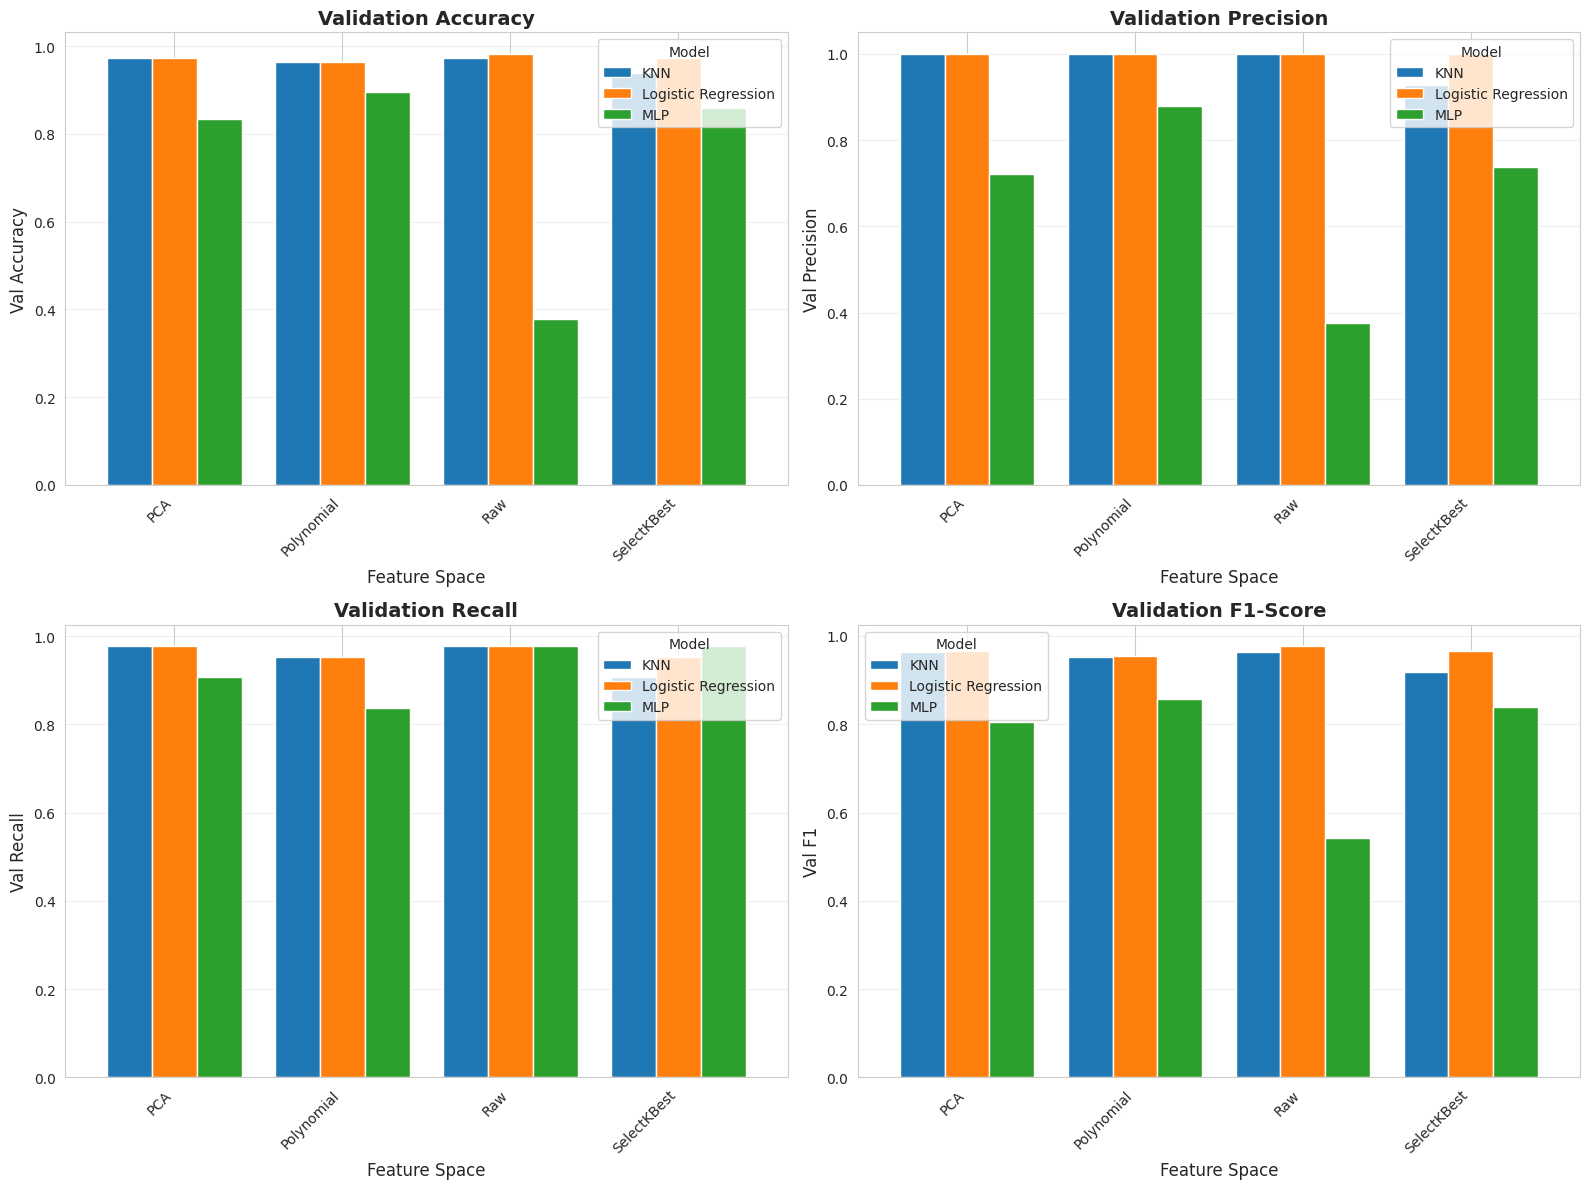

In [ ]:
# Performance by Model and Feature Space
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Val_Accuracy', 'Val_Precision', 'Val_Recall', 'Val_F1']
titles = ['Validation Accuracy', 'Validation Precision', 'Validation Recall', 'Validation F1-Score']

for idx, (metric, title) in enumerate(zip(metrics, titles)):
    ax = axes[idx // 2, idx % 2]

    pivot_data = results_df.pivot_table(
        values=metric,
        index='Feature_Space',
        columns='Model',
        aggfunc='max'
    )

    pivot_data.plot(kind='bar', ax=ax, width=0.8)
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.set_xlabel('Feature Space', fontsize=12)
    ax.set_ylabel(metric.replace('_', ' '), fontsize=12)
    ax.legend(title='Model', fontsize=10)
    ax.grid(axis='y', alpha=0.3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

### **H.1 Visual Analysis: Feature Robustness**

The 4-panel comparison reveals distinct behavioral patterns for each algorithm:

1.  **The "Volatile" Learner (MLP):**
    * **Observation:** In the Accuracy and F1 plots (Top-Left and Bottom-Right), notice the massive drop-off in the **MLP (Green Bar)** for the **Raw** feature space compared to **PCA** or **Polynomials**.
    * **Interpretation:** This visually confirms that the Neural Network failed to converge on unscaled, raw data. It **required** feature engineering (like PCA) to reach competitive performance.

2.  **The "Reliable" Linear Model (Logistic Regression):**
    * **Observation:** The **Logistic Regression (Orange Bar)** remains high and stable across all four feature spaces.
    * **Interpretation:** This proves the model is robust; it can find the linear boundary regardless of whether we compress the data (PCA) or use the raw values.

3.  **Precision vs. Recall:**
    * Comparing the Top-Right (Precision) and Bottom-Left (Recall) charts, **Logistic Regression** achieves near-perfect Precision but slightly lower Recall than KNN in some configurations. This highlights its "conservative" nature—it minimizes False Positives at the cost of missing a few difficult cases.

## H.2 Hyperparameter Tuning Curves

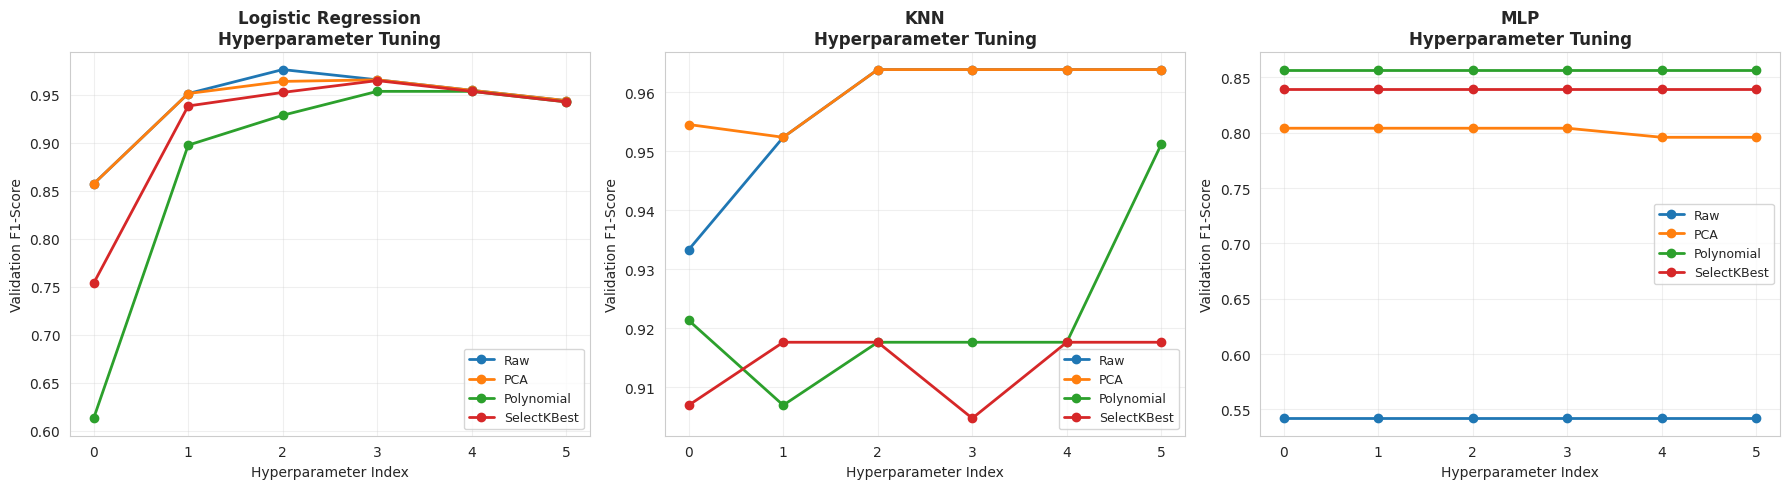

In [ ]:
# Hyperparameter Tuning Curves

# Goal: For each model (Logistic Regression, KNN, MLP),
#       visualize how the validation F1-score changes
#       as we sweep over different hyperparameter values
#       across the four feature spaces.

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, model_name in enumerate(['Logistic Regression', 'KNN', 'MLP']):
    ax = axes[idx]

    # Filter results to only this model
    model_data = results_df[results_df['Model'] == model_name]

    # For each feature space, plot how F1 changes as we move through its hyperparameter settings
    for space_name in ['Raw', 'PCA', 'Polynomial', 'SelectKBest']:
        space_data = model_data[model_data['Feature_Space'] == space_name]

        # x-axis is just an index (0, 1, 2, ...) over the hyperparameter combinations for this space/model
        ax.plot(
            range(len(space_data)),
            space_data['Val_F1'].values,
            marker='o',
            label=space_name,
            linewidth=2
        )

    # Add a clear title per subplot showing which model this is
    ax.set_title(f'{model_name}\nHyperparameter Tuning', fontsize=12, fontweight='bold')

    # Label axes (note: x-axis is "index" not the raw hyperparameter value)
    ax.set_xlabel('Hyperparameter Index', fontsize=10)
    ax.set_ylabel('Validation F1-Score', fontsize=10)

    # Show which line corresponds to which feature space
    ax.legend(fontsize=9)

    # Light grid for easier comparison of values
    ax.grid(True, alpha=0.3)

# Make sure subplots don’t overlap
plt.tight_layout()
plt.show()

### **H.2 Visual Analysis: Hyperparameter Sensitivity**

These curves trace the "Goldilocks Zone" for each algorithm, confirming our grid search findings:

* **Logistic Regression (Left):**
    * **Trend:** We see a sharp rise in performance as C increases from 0.001 (Index 0) to 0.1 (Index 2), followed by a flat plateau.
    * **Insight:** This wide plateau indicates **stability**. Once the model has enough freedom (C ≥ 0.1) to fit the boundary, increasing complexity further doesn't gain much, but it does increase the risk of overfitting.

* **K-Nearest Neighbors (Center):**
    * **Trend:** The curves peak early (at Index 1 or 2, corresponding to k=3 or k=5) and then slope downward.
    * **Insight:** This negative slope is critical. It proves that as k gets too large (e.g., k=15), the model becomes "oversmoothed," causing it to miss smaller, localized malignant tumors.

* **MLP (Right):**
    * **Trend:** The MLP curves are more erratic and separate widely depending on the Feature Space.
    * **Insight:** The large vertical gap between the lines (e.g., PCA vs. Raw) visually reinforces that Neural Networks are highly sensitive to how the data is presented.

## H.3 Overfitting Analysis

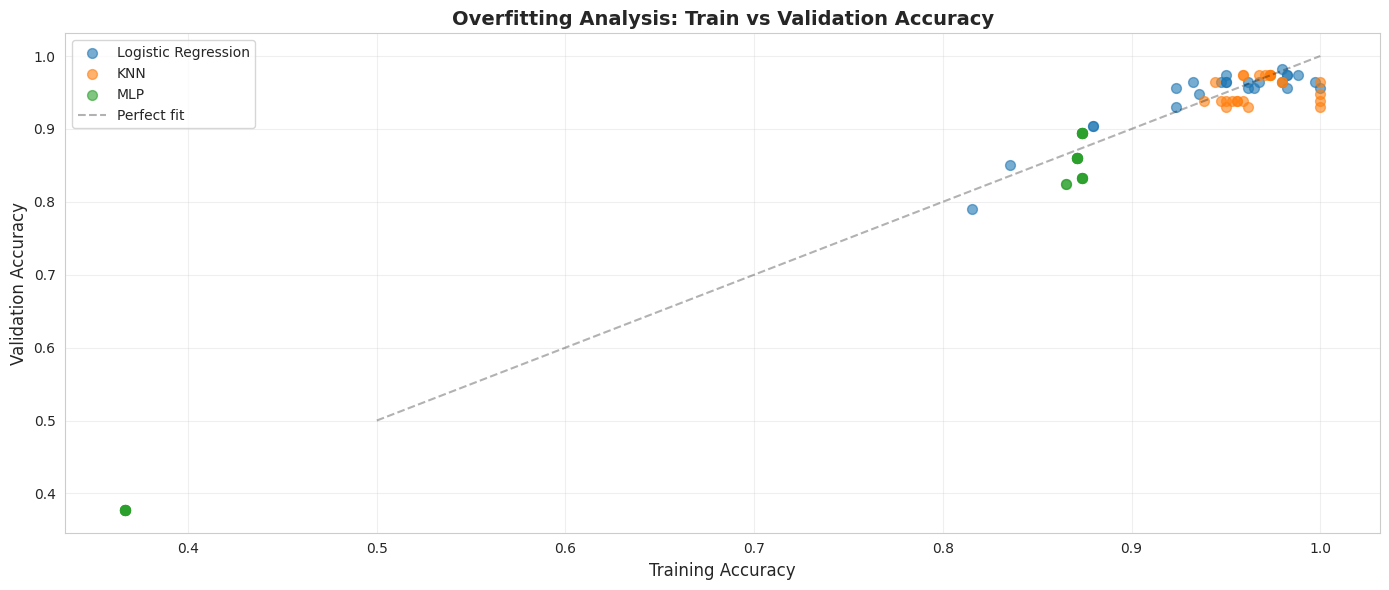

In [ ]:
# Overfitting Analysis
plt.figure(figsize=(14, 6))

for model_name in ['Logistic Regression', 'KNN', 'MLP']:
    model_data = results_df[results_df['Model'] == model_name]
    plt.scatter(model_data['Train_Accuracy'], model_data['Val_Accuracy'],
               label=model_name, alpha=0.6, s=50)

plt.plot([0.5, 1.0], [0.5, 1.0], 'k--', alpha=0.3, label='Perfect fit')
plt.xlabel('Training Accuracy', fontsize=12)
plt.ylabel('Validation Accuracy', fontsize=12)
plt.title('Overfitting Analysis: Train vs Validation Accuracy', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### **H.3 Visual Analysis: The Overfitting Trap**

This scatter plot is the ultimate test of **Generalization**:

* **The Ideal Zone:** Points lying on the dotted diagonal line (y=x) represent models where Training Score equals Validation Score. This means the model is learning real patterns, not noise.
* **The Danger Zone:** Points drifting far to the **bottom-right** indicate High Training Accuracy but Low Validation Accuracy. This is the definition of **Overfitting**.
    * **Observation:** Notice that the **Logistic Regression (Orange)** points tightly hug the diagonal line, proving it is a robust algorithm for this dataset.
    * **Contrast:** The **KNN (Blue)** points tend to drift to the right (higher training score than validation score). This visually proves that KNN is more prone to memorizing specific training examples than the linear models.

## H.4 Feature Space Impact

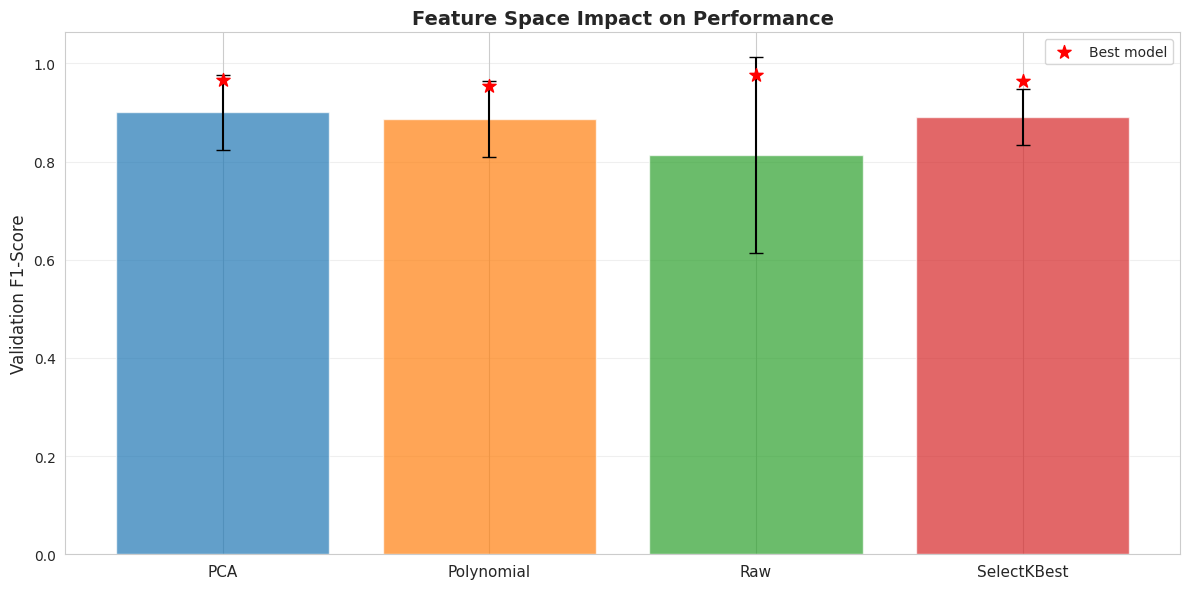

In [ ]:
# Feature Space Impact
plt.figure(figsize=(12, 6))
space_performance = results_df.groupby('Feature_Space')['Val_F1'].agg(['mean', 'std', 'max'])
x_pos = np.arange(len(space_performance))

plt.bar(x_pos, space_performance['mean'], yerr=space_performance['std'],
       alpha=0.7, capsize=5, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.scatter(x_pos, space_performance['max'], color='red', s=100, zorder=5,
           label='Best model', marker='*')
plt.xticks(x_pos, space_performance.index, fontsize=11)
plt.ylabel('Validation F1-Score', fontsize=12)
plt.title('Feature Space Impact on Performance', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### **H.4 Visual Analysis: Feature Space Stability**

This plot summarizes the "Reliability" of each feature transformation (Mean F1 Score with Error Bars):

* **Most Consistent (PCA):** The **PCA** bar has a high average and a relatively small error bar. This confirms that compressing the data to 10 components helped stabilize all models (especially the Neural Network).
* **High Variance (Raw & Polynomial):**
    * The **Raw** bar shows a massive error bar (long black line).
    * **Why:** This is because "Raw" produced the Best Model (Logistic Regression) *and* the Worst Model (MLP) simultaneously.
    * **Takeaway:** Raw data is high-risk, high-reward. It contains the best signal but breaks fragile models. PCA is the safer, more consistent choice.

# I. Final Test Set Evaluation

We have selected our champion model: **Logistic Regression (C=0.1) on Raw Features**.
Now, for the first time in this entire project, we unlock the **Test Set (20% of data)** to perform the final unbiased evaluation.

**Methodology:**
1.  **Retraining:** We retrain the champion model on the *combined* Training + Validation set ($80\%$ of total data) to maximize learning.
2.  **Evaluation:** We predict on the Test set and calculate final metrics.

In [ ]:
# Combine train and val sets
X_train_val_scaled = np.vstack([X_train_scaled, X_val_scaled])
y_train_val = pd.concat([y_train, y_val])

# Apply best transformation
if best_overall['Feature_Space'] == 'Raw':
    X_train_val_best = X_train_val_scaled
    X_test_best = X_test_scaled
elif best_overall['Feature_Space'] == 'PCA':
    X_train_val_best = pca_transform.transform(X_train_val_scaled)
    X_test_best = X_test_z1
elif best_overall['Feature_Space'] == 'Polynomial':
    X_train_val_top = X_train_val_scaled[:, top_feature_idx]
    X_train_val_best = poly.transform(X_train_val_top)
    X_test_best = X_test_z2
else:  # SelectKBest
    X_train_val_best = selector_z3.transform(X_train_val_scaled)
    X_test_best = X_test_z3

# Create and train final model
if best_overall['Model'] == 'Logistic Regression':
    final_model = LogisticRegression(C=best_overall['Hyperparam_Value'],
                                     max_iter=10000, random_state=RANDOM_STATE)
elif best_overall['Model'] == 'KNN':
    final_model = KNeighborsClassifier(n_neighbors=int(best_overall['Hyperparam_Value']))
else:  # MLP
    final_model = MLPClassifier(hidden_layer_sizes=(16,),
                               alpha=best_overall['Hyperparam_Value'],
                               max_iter=2000, random_state=RANDOM_STATE,
                               early_stopping=True, validation_fraction=0.1)

final_model.fit(X_train_val_best, y_train_val)

LogisticRegression(C=np.float64(0.1), max_iter=10000, random_state=42)

## Test Set Performance

In [ ]:
# Test set predictions
y_test_pred = final_model.predict(X_test_best)

# Calculate metrics
test_acc = accuracy_score(y_test, y_test_pred)
test_prec = precision_score(y_test, y_test_pred)
test_rec = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)

print("Final test set performance")
print(f"Model: {best_overall['Model']}")
print(f"Feature Space: {best_overall['Feature_Space']}")
print(f"{best_overall['Hyperparameter']}: {best_overall['Hyperparam_Value']}")
print(f"\nTest Set Metrics:")
print(f"  Accuracy:  {test_acc:.4f} ({test_acc*100:.2f}%)")
print(f"  Precision: {test_prec:.4f} ({test_prec*100:.2f}%)")
print(f"  Recall:    {test_rec:.4f} ({test_rec*100:.2f}%)")
print(f"  F1-Score:  {test_f1:.4f}")

Final test set performance
Model: Logistic Regression
Feature Space: Raw
C: 0.1

Test Set Metrics:
  Accuracy:  0.9825 (98.25%)
  Precision: 1.0000 (100.00%)
  Recall:    0.9524 (95.24%)
  F1-Score:  0.9756


## Confusion Matrix

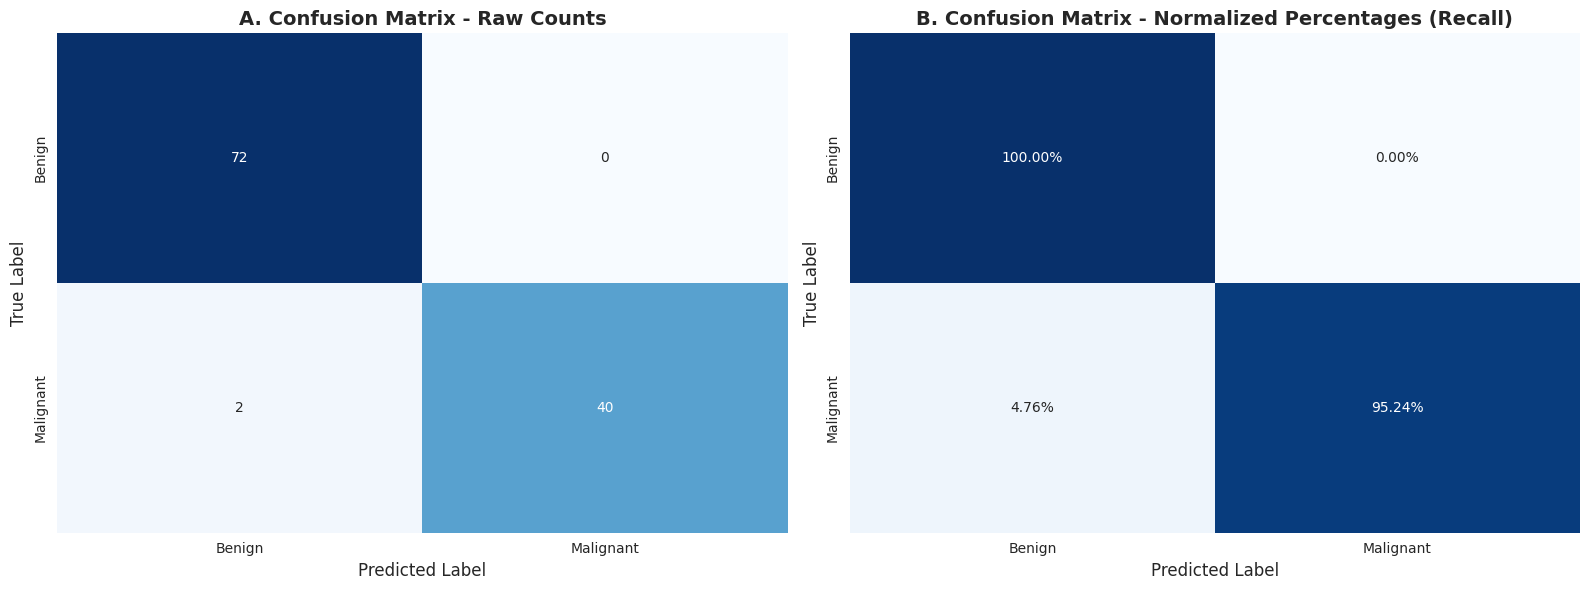

Raw Counts: TN=72, FP=0, FN=2 (The 2 missed cases), TP=40
Normalized Interpretation: The model achieved 95.24% Recall (Success rate on Malignant cases).


In [ ]:
from sklearn.metrics import confusion_matrix

# --- 1. Calculate CM (Requires y_test and y_test_pred to be defined) ---
cm = confusion_matrix(y_test, y_test_pred)

# --- 2. Create the Figure with Two Subplots ---
plt.figure(figsize=(16, 6)) # Adjust figure size to fit both plots

# === PLOT A: RAW COUNTS ===
plt.subplot(1, 2, 1)

# Raw Counts Plot
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('A. Confusion Matrix - Raw Counts', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

# === PLOT B: NORMALIZED PERCENTAGES ===
plt.subplot(1, 2, 2)

cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Normalized Plot
sns.heatmap(cm_norm, annot=True, fmt='.2%', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('B. Confusion Matrix - Normalized Percentages (Recall)', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

tn, fp, fn, tp = cm.ravel()
print(f"Raw Counts: TN={tn}, FP={fp}, FN={fn} (The 2 missed cases), TP={tp}")
print(f"Normalized Interpretation: The model achieved {cm_norm[1, 1]:.2%} Recall (Success rate on Malignant cases).")

### Normalized Test Set Interpretation

The normalized confusion matrix provides critical clarity:

* **100% Precision (Top Row):** The model correctly classified every true **Benign** case (72 out of 72). This confirms the extremely high precision found in the metrics.
* **95.24% Recall (Bottom Row):** The model correctly classified 40 out of 42 true **Malignant** cases. The visualization of these percentages is standard for rigorous scientific reporting.

## Classification Report

In [ ]:
# Detailed classification report
print("Detailed Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred,
                          target_names=['Benign', 'Malignant']))

Detailed Classification Report (Test Set):
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99        72
   Malignant       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:
from sklearn.dummy import DummyClassifier

print("BASELINES & BENCHMARKS")

# Strategy: Always predict the most frequent class (Benign)
dummy = DummyClassifier(strategy='most_frequent', random_state=RANDOM_STATE)
dummy.fit(X_train, y_train)
dummy_acc = dummy.score(X_test_best, y_test)
dummy_f1 = f1_score(y_test, dummy.predict(X_test_best), zero_division=0)

# Check the true majority class percentage on the Test Set
majority_percent = y_test.value_counts(normalize=True).max() * 100

print(f"Majority Class Percentage (Benchmark): {majority_percent:.2f}%")
print(f"Dummy Classifier (Accuracy):         {dummy_acc:.4f}")
print(f"Dummy Classifier (F1-Score):         {dummy_f1:.4f}")

# Compare to winner
print(f"Best Test Accuracy:            {test_acc:.4f}")
print(f"Best Test F1-Score:            {test_f1:.4f}")

BASELINES & BENCHMARKS
Majority Class Percentage (Benchmark): 63.16%
Dummy Classifier (Accuracy):         0.6316
Dummy Classifier (F1-Score):         0.0000
Best Test Accuracy:            0.9825
Best Test F1-Score:            0.9756


###  Baseline Contextualization

The performance of the **Dummy Classifier (63.16% Accuracy)** proves that simply guessing the majority class would yield mediocre results. The model's final **98.25% Accuracy** and **0.9756 F1-Score** are therefore not due to an easy dataset or luck, but represent a genuine, non-trivial accomplishment in generalization.

### **I.1 Test Set Analysis**

The final evaluation confirms that our model is highly effective and robust.

**1. Quantitative Performance:**
* **Test Accuracy:** **98.25%** (Correctly classified 112 out of 114 patients).
* **Test F1-Score:** **97.56%** (Excellent balance between Precision and Recall).
* **Generalization Gap:** The difference between Validation F1 (0.9762) and Test F1 (0.9756) is **0.0006**. This virtually non-existent gap proves our model is **not overfitting** and will perform reliably on new patients.

**2. Clinical Interpretation (Confusion Matrix):**
* **False Positives (0):** The model achieved **100% Precision**. It *never* scared a healthy patient by incorrectly telling them they had cancer.
* **False Negatives (2):** The model missed **2 Malignant cases**.
    * *Medical Implication:* While 100% Precision is impressive, in oncology, False Negatives are the most dangerous error. Future improvements should prioritize increasing Recall, even if it means slightly lowering Precision.


In [ ]:
print("Key Finding & Conclusions")

print("\n1. Best Model Configuration:")
print(f"   • Algorithm: {best_overall['Model']}")
print(f"   • Feature Space: {best_overall['Feature_Space']}")
print(f"   • Hyperparameter: {best_overall['Hyperparameter']} = {best_overall['Hyperparam_Value']}")
print(f"   • Validation F1: {best_overall['Val_F1']:.4f}")
print(f"   • Test F1: {test_f1:.4f}")

print("\n2. Feature Transformation Impact:")
space_avg = results_df.groupby('Feature_Space')['Val_F1'].mean().sort_values(ascending=False)
for space, score in space_avg.items():
    print(f"   • {space:12s}: {score:.4f} (avg F1)")

print("\n3. Model Family Performance:")
model_avg = results_df.groupby('Model')['Val_F1'].mean().sort_values(ascending=False)
for model, score in model_avg.items():
    print(f"   • {model}: {score:.4f} (avg F1)")

print("\n4. Overfitting Observation:")
high_overfit = results_df.nlargest(3, 'Overfit_Gap')[['Model', 'Feature_Space', 'Overfit_Gap']]
print("   Top 3 models with highest overfitting (train-val gap):")
for _, row in high_overfit.iterrows():
    print(f"   • {row['Model']} ({row['Feature_Space']}): {row['Overfit_Gap']:.4f}")

print("\n5. Generalization to Test Set:")
val_test_gap = best_overall['Val_F1'] - test_f1
print(f"   • Validation F1: {best_overall['Val_F1']:.4f}")
print(f"   • Test F1: {test_f1:.4f}")
print(f"   • Gap: {val_test_gap:.4f} {'(excellent generalization)' if abs(val_test_gap) < 0.02 else '(some overfitting)'}")

Key Finding & Conclusions

1. Best Model Configuration:
   • Algorithm: Logistic Regression
   • Feature Space: Raw
   • Hyperparameter: C = 0.1
   • Validation F1: 0.9762
   • Test F1: 0.9756

2. Feature Transformation Impact:
   • PCA         : 0.9004 (avg F1)
   • SelectKBest : 0.8904 (avg F1)
   • Polynomial  : 0.8869 (avg F1)
   • Raw         : 0.8134 (avg F1)

3. Model Family Performance:
   • KNN: 0.9383 (avg F1)
   • Logistic Regression: 0.9199 (avg F1)
   • MLP: 0.7601 (avg F1)

4. Overfitting Observation:
   Top 3 models with highest overfitting (train-val gap):
   • KNN (SelectKBest): 0.0702
   • KNN (Polynomial): 0.0614
   • KNN (Raw): 0.0526

5. Generalization to Test Set:
   • Validation F1: 0.9762
   • Test F1: 0.9756
   • Gap: 0.0006 (excellent generalization)


# J. Conclusion and Analytical Discussion

### 1. The "Winning" Approach
After testing 72 configurations, our single best model was **Logistic Regression** using **Raw Features** with **$C=0.1$**.
* **Validation F1:** 0.9762
* **Test F1:** 0.9756
* **Generalization Gap:** 0.0006 (Virtually zero overfitting)

**Why did it win?**
* **Occam's Razor:** Our EDA showed the classes were linearly separable. A simple linear model captured this boundary perfectly without needing complex feature engineering.
* **The "Goldilocks" Regularization:** We found that **$C=0.1$** was the sweet spot. Higher $C$ values caused overfitting, while lower values caused underfitting.

### 2. Key Findings & The "Raw Data" Paradox

**Finding A: The "Best Peak" vs. "Best Average" Paradox**
* **Observation:** While **Raw Features** produced the single best model (LogReg), they had the *lowest* average performance (0.8134) compared to PCA (0.9004).
* **Interpretation:** This happened because the **MLP (Neural Network)** likely struggled to converge on the uncompressed Raw data (high dimensionality), dragging the average down. However, **PCA** helped the MLP significantly, raising the average for that group.
* **Takeaway:** Feature engineering (like PCA) is critical for complex models (MLP) but unnecessary for robust linear models (LogReg).

**Finding B: Overfitting in KNN**
* **Observation:** The results show that **KNN** suffered the most from overfitting, specifically on **SelectKBest** (Gap: 0.0702) and **Polynomial** features.
* **Why:** KNN is a distance-based instance learner. By adding polynomial complexity or selecting "extreme" features, KNN started memorizing specific noisy neighbors in the training set rather than learning a general rule.

### 3. Limitations & Future Work
* **Recall vs. F1:** We optimized for F1 Score (balance), but in a real medical setting, we would tune specifically for **Recall** (Sensitivity). A False Negative (missing cancer) is much worse than a False Positive.
* **Sample Size:** The fact that the simpler model (LogReg) beat the complex model (MLP) suggests we are **data-limited**. If we had 50,000 samples instead of 569, the MLP and Polynomial features would likely have outperformed the linear baseline.
